In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

## Business Problem:
    
A FMCG company has entered into the instant noodles business two years back. Their higher 
management has notices that there is a miss match in the demand and supply. Where the demand is 
high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an 
inventory cost loss to the company; hence, the higher management wants to optimize the supply 
quantity in each and every warehouse in entire country.

## Goal & Objective: 
    The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the 
    product to be shipped each time to the warehouse. Also we will analyse the demand pattern in different pockets of the 
    country so management can drive the advertisement campaign particular in those pockets.

### Load the data:

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('Data.csv')

### Checking the data:

In [4]:
# Check top few records to get a feel of the data structure
df.head(10)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   
5     WH_100005     EID_50005         Rural            Small   West   
6     WH_100006     EID_50006         Rural            Large   West   
7     WH_100007     EID_50007         Rural            Large  North   
8     WH_100008     EID_50008         Rural            Small  South   
9     WH_100009     EID_50009         Rural            Small  South   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   
5           Zone 1                   8                    0   
6           Zone 6                   8                    0   
7           Zone 5                   1                    0   
8           Zone 6                   8                    1   
9           Zone 6                   4                    3   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   
5                  2             5053  ...               1            152   
6                  4             4449  ...               1             77   
7                  4             7183  ...               0            241   
8                  4             5381  ...               1            124   
9                  3             3869  ...               0             78   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   
5         35.0       2009.0                          23              1   
6         27.0       2010.0                          24              0   
7         23.0          NaN                          18              0   
8         22.0       2013.0                          13              1   
9         43.0          NaN                           6              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   
5                            A+                 3               3   
6                             B                 3               6   
7                             C                 6              24   
8                            A+                 5               2   
9                             C                 6               2   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4  

In [5]:
df.tail(5)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
24995                  4             5390  ...               1            142   
24996                  4             4490  ...               1            130   
24997                  2             5403  ...               1            147   
24998                  2            10562  ...               1             60   
24999                  4             5664  ...               1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
24995         34.0       2005.0                          22              1   
24996         28.0       2012.0                          10              0   
24997          NaN          NaN                          23              0   
24998         25.0          NaN                          18              0   
24999         39.0       2019.0                           4              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
24995                             A                 2              30   
24996                             B                 4              18   
24997                            B+                 5              25   
24998                             A                 6              30   
24999                            B+                 2              11   

       product_wg_ton  
24995           32093  
24996           12114  
24997           27080  
24998           25093  
24999            5058  

[5 rows x 24 columns]

### Checking columns of dataset:

In [6]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

### Checking the shape of the data :

In [7]:
# Checking the shape of the dataset.
print("Number of rows: ",df.shape[0], "\n""Number of columns: ",df.shape[1])

Number of rows:  25000 
Number of columns:  24


### Retreive the list of fields along with their data type:

In [8]:
#Getting the info data types column wise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [9]:
df['product_wg_ton'].unique()

array([17115,  5074, 23137, ..., 33073, 40070, 11071], dtype=int64)

### Observation-1:

- The data set contains 25000 row, 24 columns.
- In the given data set there are 14 Integer type features,2 Float type features. 8 Object type features. 
- 'product_wg_ton' is the target variable and all other are predictor variable.

### Checking the Summary Statistic:

In [10]:
df.describe(include='all').T

count unique            top   freq  \
Ware_house_ID                   25000  25000      WH_100000      1   
WH_Manager_ID                   25000  25000      EID_50000      1   
Location_type                   25000      2          Rural  22957   
WH_capacity_size                25000      3          Large  10169   
zone                            25000      4          North  10278   
WH_regional_zone                25000      6         Zone 6   8339   
num_refill_req_l3m            25000.0    NaN            NaN    NaN   
transport_issue_l1y           25000.0    NaN            NaN    NaN   
Competitor_in_mkt             25000.0    NaN            NaN    NaN   
retail_shop_num               25000.0    NaN            NaN    NaN   
wh_owner_type                   25000      2  Company Owned  13578   
distributor_num               25000.0    NaN            NaN    NaN   
flood_impacted                25000.0    NaN            NaN    NaN   
flood_proof                   25000.0    NaN            NaN    NaN   
electric_supply               25000.0    NaN            NaN    NaN   
dist_from_hub                 25000.0    NaN            NaN    NaN   
workers_num                   24010.0    NaN            NaN    NaN   
wh_est_year                   13119.0    NaN            NaN    NaN   
storage_issue_reported_l3m    25000.0    NaN            NaN    NaN   
temp_reg_mach                 25000.0    NaN            NaN    NaN   
approved_wh_govt_certificate    24092      5              C   5501   
wh_breakdown_l3m              25000.0    NaN            NaN    NaN   
govt_check_l3m                25000.0    NaN            NaN    NaN   
product_wg_ton                25000.0    NaN            NaN    NaN   

                                     mean           std     min      25%  \
Ware_house_ID                         NaN           NaN     NaN      NaN   
WH_Manager_ID                         NaN           NaN     NaN      NaN   
Location_type                         NaN           NaN     NaN      NaN   
WH_capacity_size                      NaN           NaN     NaN      NaN   
zone                                  NaN           NaN     NaN      NaN   
WH_regional_zone                      NaN           NaN     NaN      NaN   
num_refill_req_l3m                4.08904      2.606612     0.0      2.0   
transport_issue_l1y               0.77368      1.199449     0.0      0.0   
Competitor_in_mkt                  3.1042      1.141663     0.0      2.0   
retail_shop_num                4985.71156   1052.825252  1821.0   4313.0   
wh_owner_type                         NaN           NaN     NaN      NaN   
distributor_num                  42.41812     16.064329    15.0     29.0   
flood_impacted                    0.09816      0.297537     0.0      0.0   
flood_proof                       0.05464      0.227281     0.0      0.0   
electric_supply                   0.65688      0.474761     0.0      0.0   
dist_from_hub                   163.53732     62.718609    55.0    109.0   
workers_num                     28.944398      7.872534    10.0     24.0   
wh_est_year                   2009.383185       7.52823  1996.0   2003.0   
storage_issue_reported_l3m       17.13044      9.161108     0.0     10.0   
temp_reg_mach                     0.30328      0.459684     0.0      0.0   
approved_wh_govt_certificate          NaN           NaN     NaN      NaN   
wh_breakdown_l3m                  3.48204      1.690335     0.0      2.0   
govt_check_l3m                   18.81228      8.632382     1.0     11.0   
product_wg_ton                22102.63292  11607.755077  2065.0  13059.0   

                                  50%      75%      max  
Ware_house_ID                     NaN      NaN      NaN  
WH_Manager_ID                     NaN      NaN      NaN  
Location_type                     NaN      NaN      NaN  
WH_capacity_size                  NaN      NaN      NaN  
zone                              NaN      NaN      NaN  
WH_regional_zone                

### Checking for Missing Values

In [11]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [12]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 2.3 %


### Checking for duplicate values:

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Observations-2:

- 'workers_num' variable has 990 missing values.
- 'wh_est_year' variable has 11881 missing values.
- 'approved_wh_govt_certificate' variable has 908 missing values.
- Totally 2.3% of the data has null values.
- No duplicate values present in the dataset.

In [14]:
df1=df.copy()

In [15]:
df1.drop(['Ware_house_ID', 'WH_Manager_ID'], axis=1, inplace=True)

In [16]:
# Checking the shape of the dataset.
print("Number of rows: ",df1.shape[0], "\n""Number of columns: ",df1.shape[1])

Number of rows:  25000 
Number of columns:  22


In [17]:
#Getting the info data types column wise
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

### Getting the summary statistics of the  object variable.

In [18]:
df1.describe(include=['object']).T

count unique            top   freq
Location_type                 25000      2          Rural  22957
WH_capacity_size              25000      3          Large  10169
zone                          25000      4          North  10278
WH_regional_zone              25000      6         Zone 6   8339
wh_owner_type                 25000      2  Company Owned  13578
approved_wh_govt_certificate  24092      5              C   5501

# Data Visualization:

## Univariate analysis

### 1. num_refill_req_l3m Variable:

<AxesSubplot:xlabel='num_refill_req_l3m'>

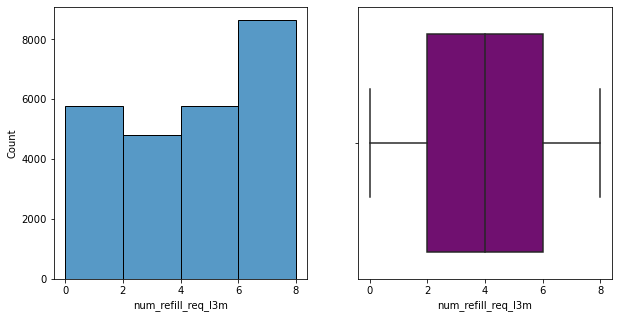

In [19]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['num_refill_req_l3m'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='num_refill_req_l3m',data=df1, ax=axs[1], color='purple')

### 2. transport_issue_l1y Variable:

<AxesSubplot:xlabel='transport_issue_l1y'>

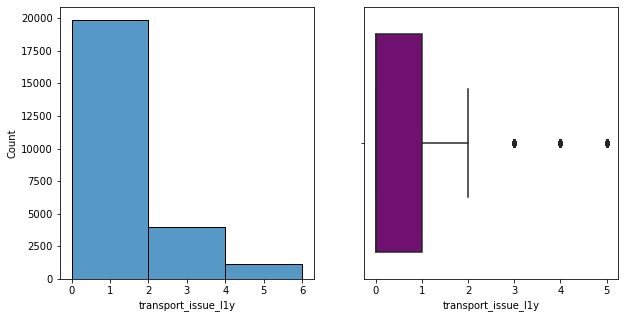

In [20]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['transport_issue_l1y'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='transport_issue_l1y',data=df1, ax=axs[1], color='purple')

### 3. Competitor_in_mkt Variable:

<AxesSubplot:xlabel='Competitor_in_mkt'>

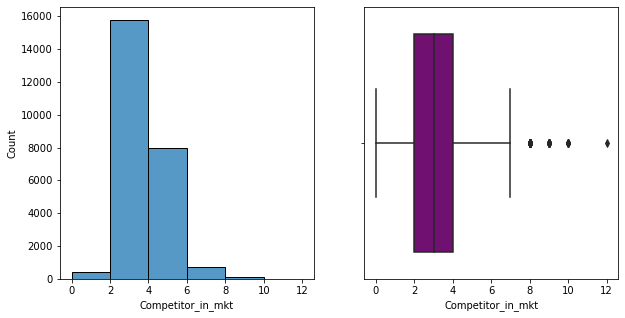

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['Competitor_in_mkt'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='Competitor_in_mkt',data=df1, ax=axs[1], color='purple')

### 4. retail_shop_num Variable:

<AxesSubplot:xlabel='retail_shop_num'>

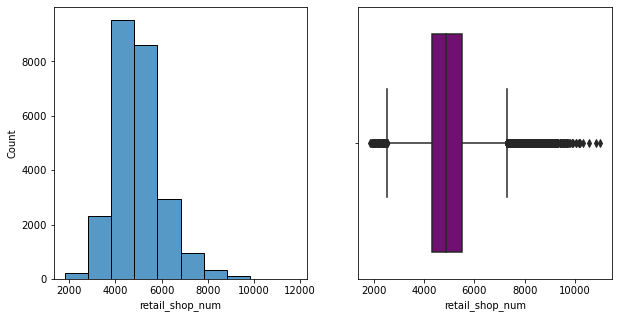

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['retail_shop_num'],binwidth=1000,kde=False, ax=axs[0])
sns.boxplot(x='retail_shop_num',data=df1, ax=axs[1], color='purple')

### 5. distributor_num Variable:

<AxesSubplot:xlabel='distributor_num'>

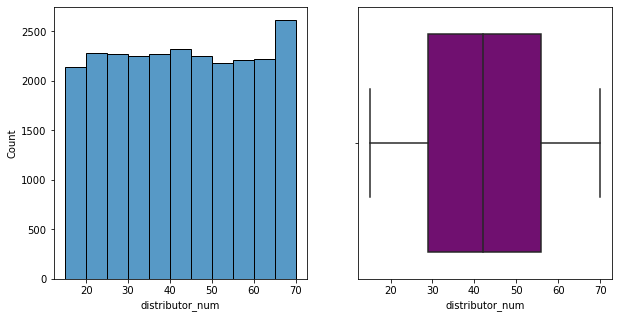

In [23]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['distributor_num'],binwidth=5,kde=False, ax=axs[0])
sns.boxplot(x='distributor_num',data=df1, ax=axs[1], color='purple')

### 6. flood_impacted Variable:

<AxesSubplot:xlabel='flood_impacted'>

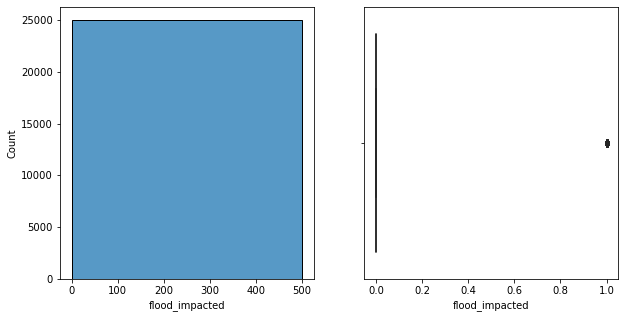

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['flood_impacted'],binwidth=500,kde=False, ax=axs[0])
sns.boxplot(x='flood_impacted',data=df1, ax=axs[1], color='purple')

### 7. flood_proof Variable:

<AxesSubplot:xlabel='flood_proof'>

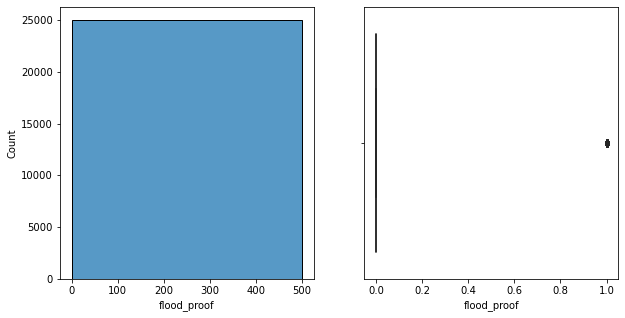

In [25]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['flood_proof'],binwidth=500,kde=False, ax=axs[0])
sns.boxplot(x='flood_proof',data=df1, ax=axs[1], color='purple')

### 8. Electric_supply Variable:

<AxesSubplot:xlabel='electric_supply'>

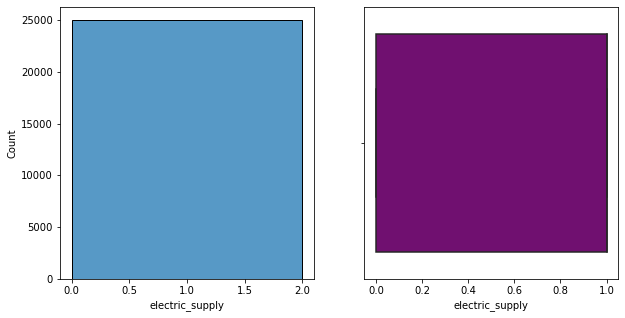

In [26]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['electric_supply'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='electric_supply',data=df1, ax=axs[1], color='purple')

### 9. Dist_from_hub Variable:

<AxesSubplot:xlabel='dist_from_hub'>

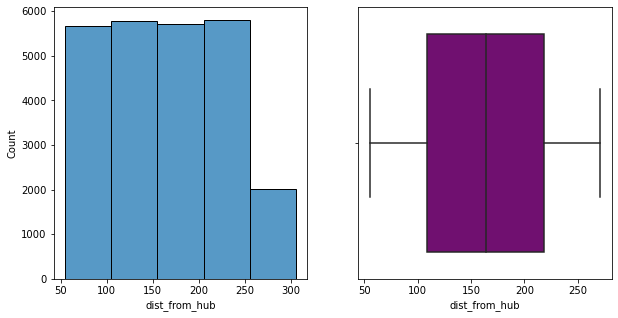

In [27]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['dist_from_hub'],binwidth=50,kde=False, ax=axs[0])
sns.boxplot(x='dist_from_hub',data=df1, ax=axs[1], color='purple')

### 10. Workers_num Variable:

<AxesSubplot:xlabel='workers_num'>

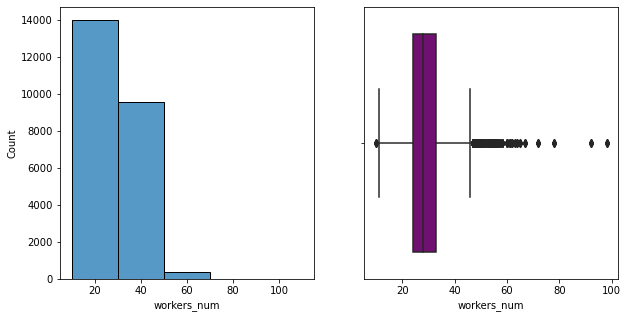

In [28]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['workers_num'],binwidth=20,kde=False, ax=axs[0])
sns.boxplot(x='workers_num',data=df1, ax=axs[1], color='purple')

### 11. Wh_est_year Variable:

<AxesSubplot:xlabel='wh_est_year'>

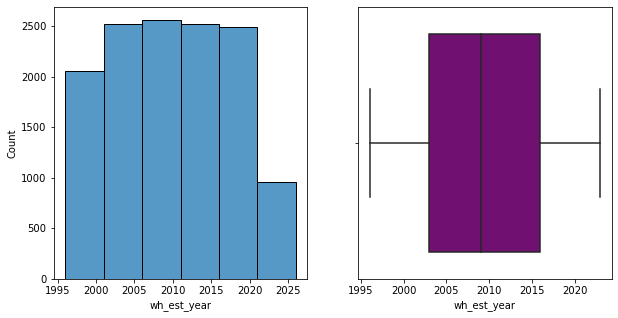

In [29]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['wh_est_year'],binwidth=5,kde=False, ax=axs[0])
sns.boxplot(x='wh_est_year',data=df1, ax=axs[1], color='purple')

### 12. Storage_issue_reported_l3m Varialbe:

<AxesSubplot:xlabel='storage_issue_reported_l3m'>

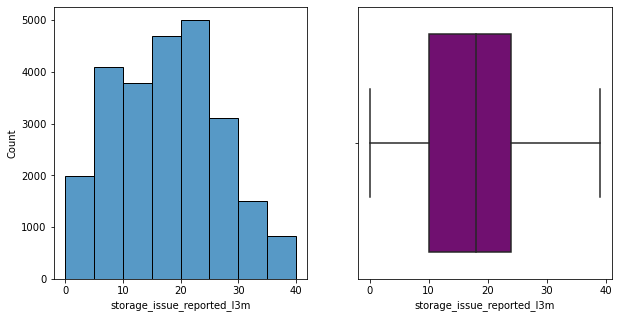

In [30]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['storage_issue_reported_l3m'],binwidth=5,kde=False, ax=axs[0])
sns.boxplot(x='storage_issue_reported_l3m',data=df1, ax=axs[1], color='purple')

### 13. Temp_reg_mach Variable:

<AxesSubplot:xlabel='temp_reg_mach'>

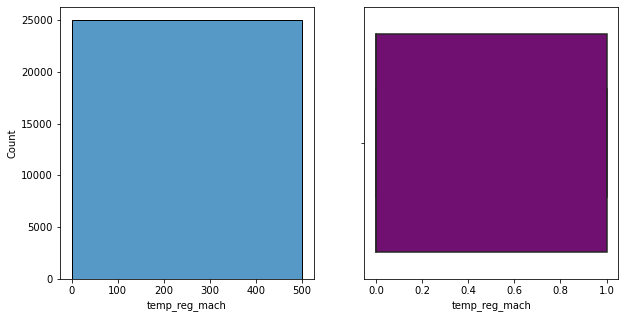

In [31]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['temp_reg_mach'],binwidth=500,kde=False, ax=axs[0])
sns.boxplot(x='temp_reg_mach',data=df1, ax=axs[1], color='purple')

### 14. wh_breakdown_l3m Variable:

<AxesSubplot:xlabel='wh_breakdown_l3m'>

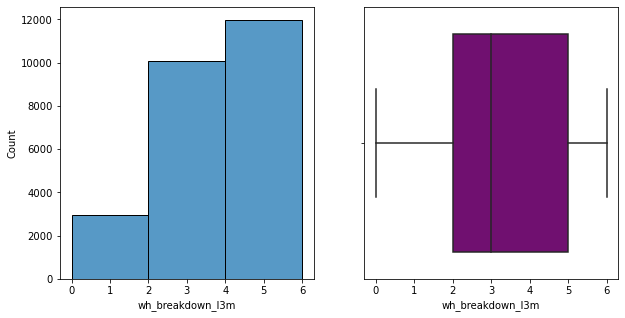

In [32]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['wh_breakdown_l3m'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='wh_breakdown_l3m',data=df1, ax=axs[1], color='purple')

### 15. Govt_check_l3m Variable:

<AxesSubplot:xlabel='govt_check_l3m'>

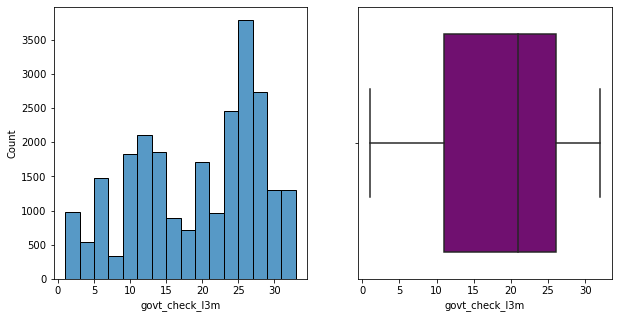

In [33]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['govt_check_l3m'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='govt_check_l3m',data=df1, ax=axs[1], color='purple')

### 16. Product_wg_ton Variable:

<AxesSubplot:xlabel='product_wg_ton'>

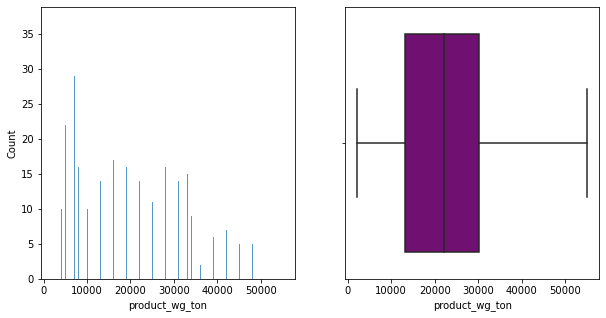

In [34]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df1['product_wg_ton'],binwidth=2,kde=False, ax=axs[0])
sns.boxplot(x='product_wg_ton',data=df1, ax=axs[1], color='purple')

## Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.
The function should display the frequency of all the levels within the field and display a frequency plot

### Getting unique counts of Categorical Variables

In [35]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df1_cat[cat_column].value_counts())
    plt.figure()
    df1_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [36]:
df1_cat = df1.select_dtypes(include = ['object'])
lstcatcolumns = list(df1_cat.columns.values)
lstcatcolumns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

Details of Location_type
----------------------------------------------------------------
Rural    22957
Urban     2043
Name: Location_type, dtype: int64


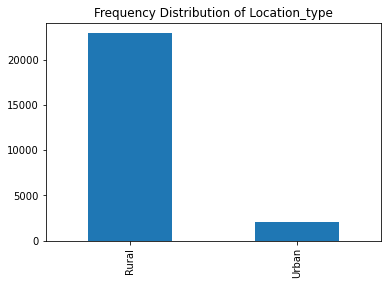

       
Details of WH_capacity_size
----------------------------------------------------------------
Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


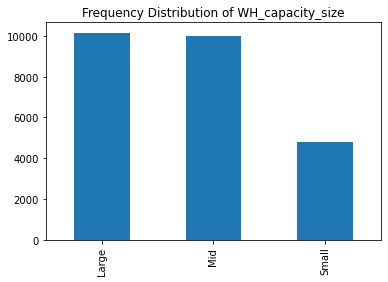

       
Details of zone
----------------------------------------------------------------
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64


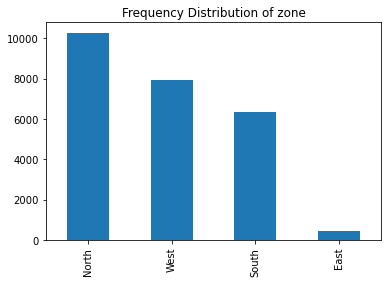

       
Details of WH_regional_zone
----------------------------------------------------------------
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64


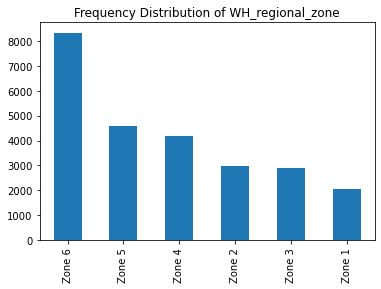

       
Details of wh_owner_type
----------------------------------------------------------------
Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64


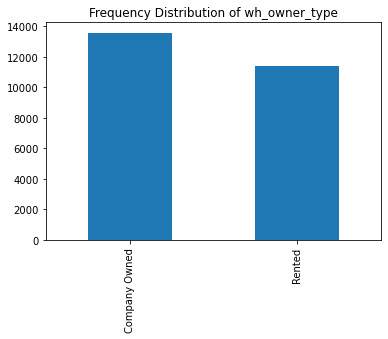

       
Details of approved_wh_govt_certificate
----------------------------------------------------------------
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


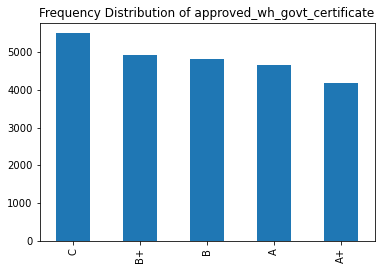

In [37]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='count'>

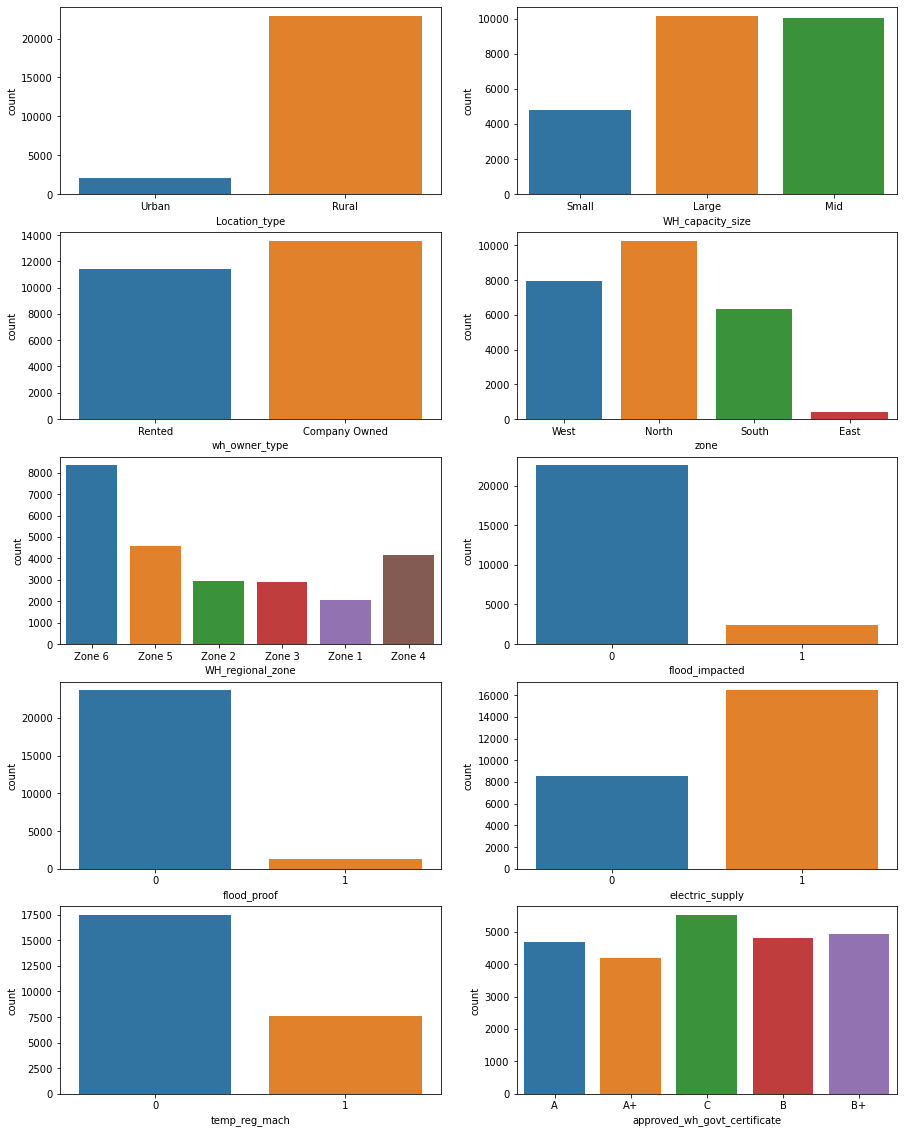

In [38]:
fig = plt.figure(figsize = (15,20))

ax1 = fig.add_subplot(5,2,1)
sns.countplot(data = df1, x = 'Location_type', ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.countplot(data = df1, x = 'WH_capacity_size', ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.countplot(data = df1, x = 'wh_owner_type', ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.countplot(data = df1, x = 'zone', ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.countplot(data = df1, x = 'WH_regional_zone', ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.countplot(data = df1, x = 'flood_impacted', ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.countplot(data = df1, x = 'flood_proof', ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.countplot(data = df1, x = 'electric_supply', ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.countplot(data = df1, x = 'temp_reg_mach', ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.countplot(data = df1, x = 'approved_wh_govt_certificate', ax=ax10)

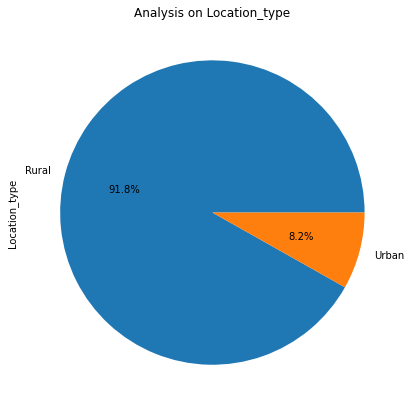

In [39]:
df1['Location_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on Location_type')
plt.show()

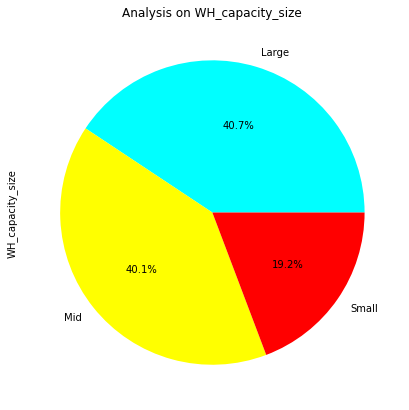

In [40]:
df1['WH_capacity_size'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors= ['cyan','yellow','red'])
plt.title('Analysis on WH_capacity_size')
plt.show()

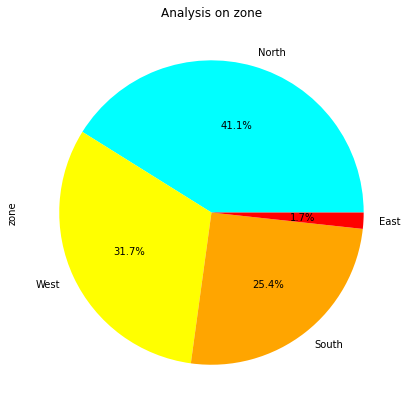

In [41]:
df1['zone'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['cyan','yellow','orange','red'])
plt.title('Analysis on zone')
plt.show()

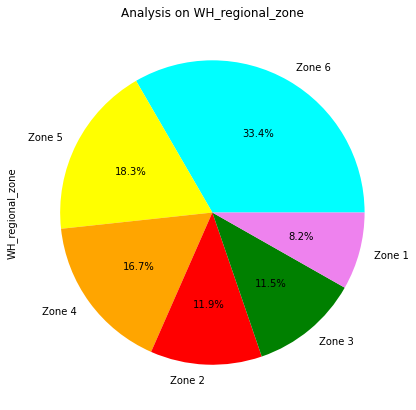

In [42]:
df1['WH_regional_zone'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['cyan','yellow','orange','red','green','violet'])
plt.title('Analysis on WH_regional_zone')
plt.show()

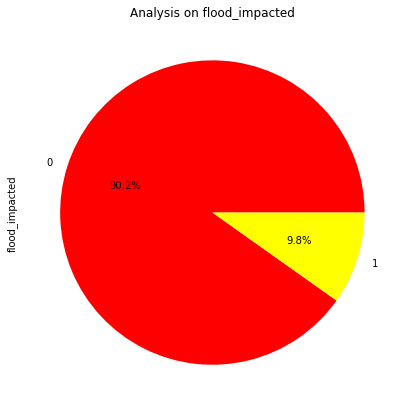

In [43]:
df1['flood_impacted'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['red','yellow'])
plt.title('Analysis on flood_impacted')
plt.show()

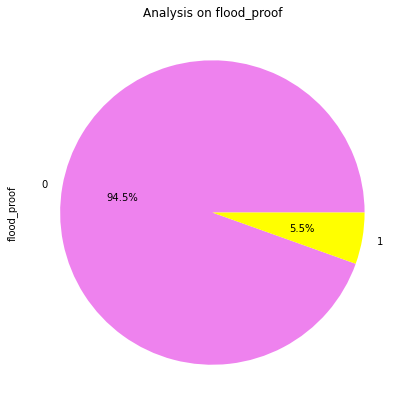

In [44]:
df1['flood_proof'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['violet','yellow'])
plt.title('Analysis on flood_proof')
plt.show()

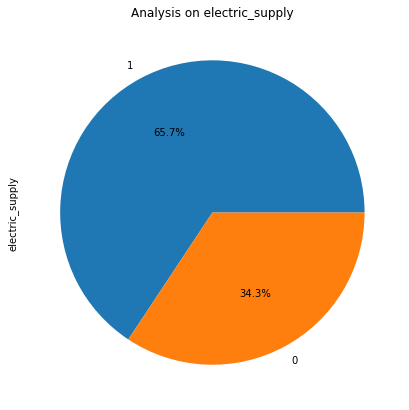

In [45]:
df1['electric_supply'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.title('Analysis on electric_supply')
plt.show()

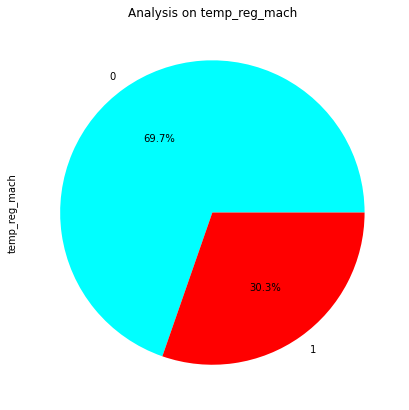

In [46]:
df1['temp_reg_mach'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['cyan','red'])
plt.title('Analysis on temp_reg_mach')
plt.show()

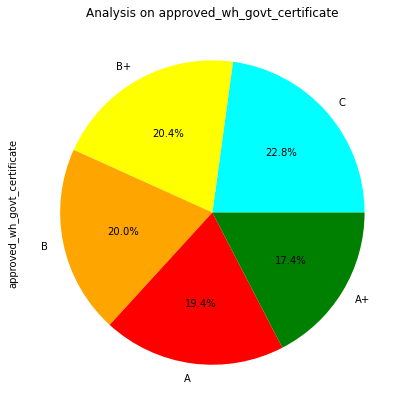

In [47]:
df1['approved_wh_govt_certificate'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['cyan','yellow','orange','red','green'])
plt.title('Analysis on approved_wh_govt_certificate')
plt.show()

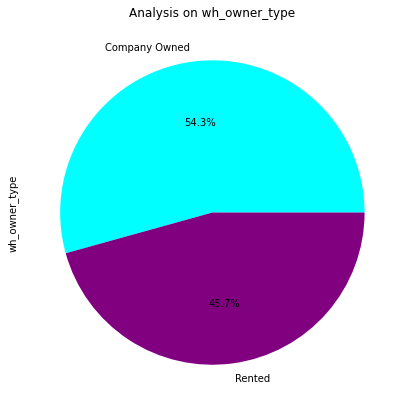

In [48]:
df1['wh_owner_type'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(10,7),colors = ['cyan','purple'])
plt.title('Analysis on wh_owner_type')
plt.show()

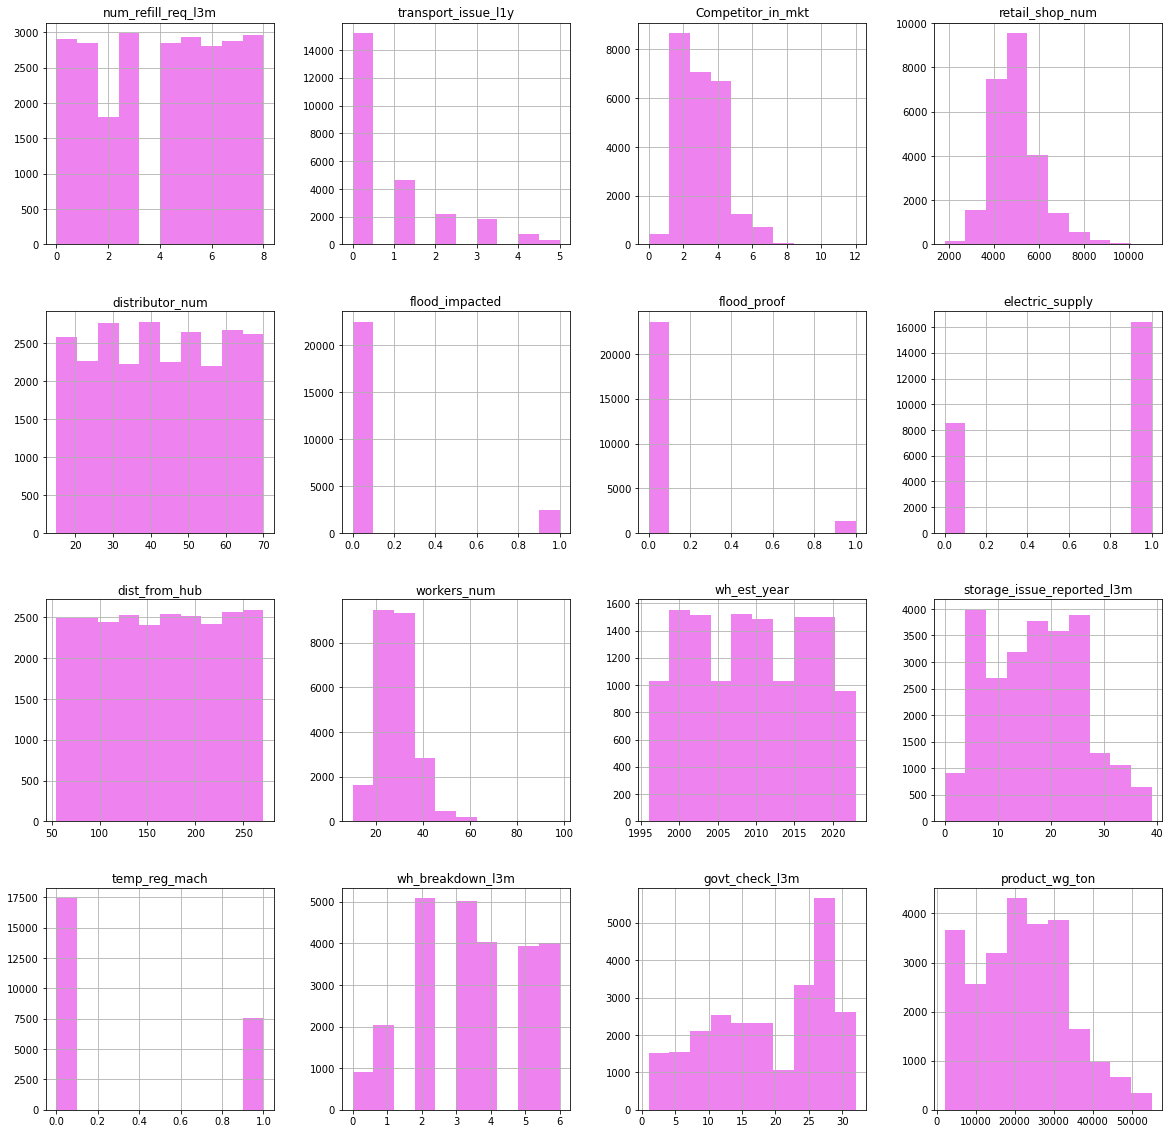

In [49]:
df1.hist(figsize=(20,20),color='violet');

### SKEWNESS VALUE:

In [50]:
# Let's check the skewness values quantitativel y
df1.skew().sort_values(ascending=False).round(2)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_11372/3176634835.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew().sort_values(ascending=False).round(2)


flood_proof                   3.92
flood_impacted                2.70
transport_issue_l1y           1.61
workers_num                   1.06
Competitor_in_mkt             0.98
retail_shop_num               0.91
temp_reg_mach                 0.86
product_wg_ton                0.33
storage_issue_reported_l3m    0.11
distributor_num               0.02
wh_est_year                   0.01
dist_from_hub                -0.01
wh_breakdown_l3m             -0.07
num_refill_req_l3m           -0.08
govt_check_l3m               -0.36
electric_supply              -0.66
dtype: float64

In [51]:
df1.mean().sort_values(ascending=False).round(2)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_11372/4014275338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean().sort_values(ascending=False).round(2)


product_wg_ton                22102.63
retail_shop_num                4985.71
wh_est_year                    2009.38
dist_from_hub                   163.54
distributor_num                  42.42
workers_num                      28.94
govt_check_l3m                   18.81
storage_issue_reported_l3m       17.13
num_refill_req_l3m                4.09
wh_breakdown_l3m                  3.48
Competitor_in_mkt                 3.10
transport_issue_l1y               0.77
electric_supply                   0.66
temp_reg_mach                     0.30
flood_impacted                    0.10
flood_proof                       0.05
dtype: float64

In [52]:
df1.median().sort_values(ascending=False).round(2)

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_11372/249165973.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median().sort_values(ascending=False).round(2)


product_wg_ton                22101.0
retail_shop_num                4859.0
wh_est_year                    2009.0
dist_from_hub                   164.0
distributor_num                  42.0
workers_num                      28.0
govt_check_l3m                   21.0
storage_issue_reported_l3m       18.0
num_refill_req_l3m                4.0
Competitor_in_mkt                 3.0
wh_breakdown_l3m                  3.0
electric_supply                   1.0
transport_issue_l1y               0.0
flood_impacted                    0.0
flood_proof                       0.0
temp_reg_mach                     0.0
dtype: float64

### Bivariate Analysis:

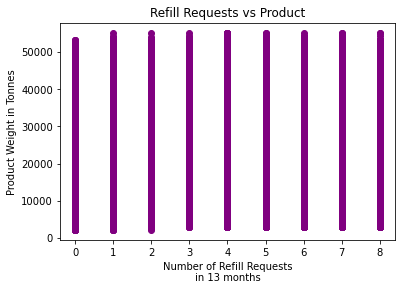

In [53]:
plt.scatter(df1.num_refill_req_l3m,df1.product_wg_ton,color='purple')
plt.title('Refill Requests vs Product')
plt.xlabel('Number of Refill Requests\nin 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

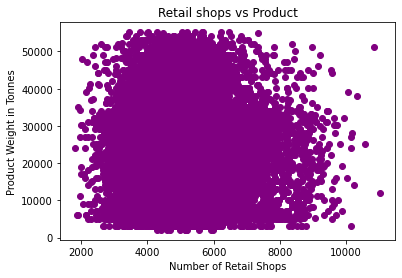

In [54]:
plt.scatter(df1.retail_shop_num,df1.product_wg_ton,color='purple')
plt.title('Retail shops vs Product')
plt.xlabel('Number of Retail Shops')
plt.ylabel('Product Weight in Tonnes')
plt.show()

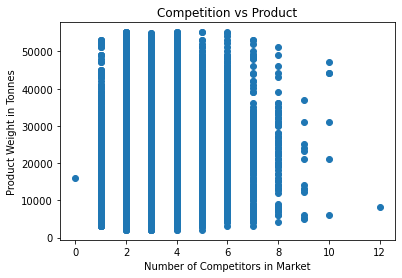

In [55]:
plt.scatter(df1.Competitor_in_mkt,df1.product_wg_ton)
plt.title('Competition vs Product')
plt.xlabel('Number of Competitors in Market')
plt.ylabel('Product Weight in Tonnes')
plt.show()

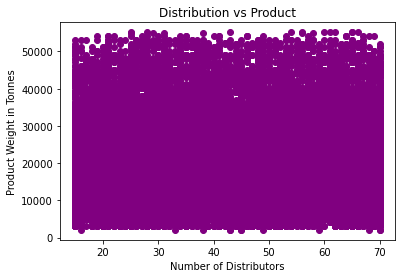

In [56]:
plt.scatter(df1.distributor_num,df1.product_wg_ton,color='purple')
plt.title('Distribution vs Product')
plt.xlabel('Number of Distributors')
plt.ylabel('Product Weight in Tonnes')
plt.show()

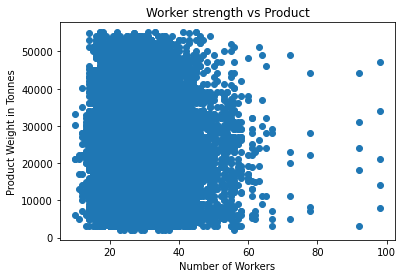

In [57]:
plt.scatter(df1.workers_num,df1.product_wg_ton)
plt.title('Worker strength vs Product')
plt.xlabel('Number of Workers')
plt.ylabel('Product Weight in Tonnes')
plt.show()

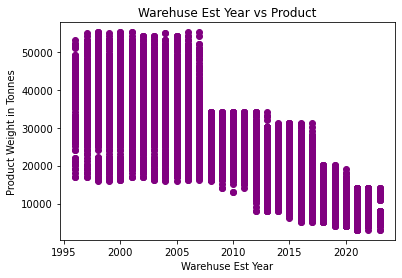

In [58]:
plt.scatter(df1.wh_est_year,df1.product_wg_ton,color='purple')
plt.title('Warehuse Est Year vs Product')
plt.xlabel('Warehuse Est Year')
plt.ylabel('Product Weight in Tonnes')
plt.show()

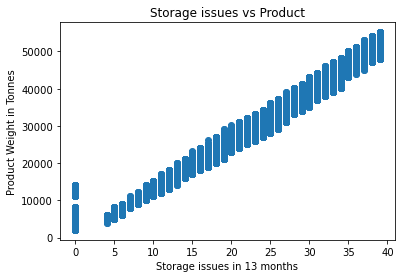

In [59]:
plt.scatter(df1.storage_issue_reported_l3m,df1.product_wg_ton)
plt.title('Storage issues vs Product')
plt.xlabel('Storage issues in 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

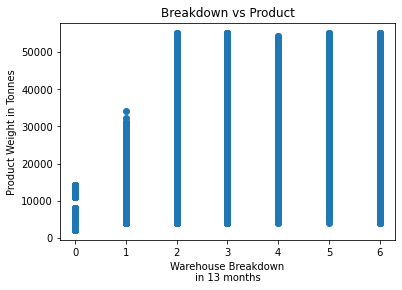

In [60]:
plt.scatter(df1.wh_breakdown_l3m,df1.product_wg_ton)
plt.title('Breakdown vs Product')
plt.xlabel('Warehouse Breakdown\nin 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

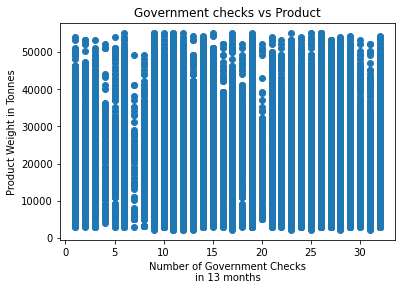

In [61]:
plt.scatter(df1.govt_check_l3m,df1.product_wg_ton)
plt.title('Government checks vs Product')
plt.xlabel('Number of Government Checks\nin 13 months')
plt.ylabel('Product Weight in Tonnes')
plt.show()

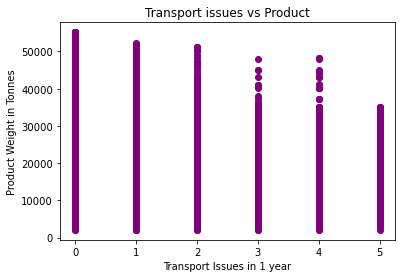

In [62]:
plt.scatter(df1.transport_issue_l1y,df1.product_wg_ton,color='purple')
plt.title('Transport issues vs Product')
plt.xlabel('Transport Issues in 1 year')
plt.ylabel('Product Weight in Tonnes')
plt.show()

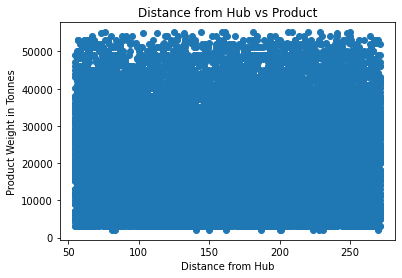

In [63]:
plt.scatter(df1.dist_from_hub,df1.product_wg_ton)
plt.title('Distance from Hub vs Product')
plt.xlabel('Distance from Hub')
plt.ylabel('Product Weight in Tonnes')
plt.show()

In [64]:
df1[['WH_capacity_size','product_wg_ton','num_refill_req_l3m','wh_breakdown_l3m']].groupby('WH_capacity_size').mean().reset_index()

WH_capacity_size  product_wg_ton  num_refill_req_l3m  wh_breakdown_l3m
0            Large    22100.487855            4.093815          3.475268
1              Mid    22202.298104            4.113473          3.496906
2            Small    21899.591561            4.028061          3.465392

In [65]:
df1[
  ['approved_wh_govt_certificate','product_wg_ton','workers_num']
  ].groupby('approved_wh_govt_certificate').mean().sort_values(by='product_wg_ton',ascending=False).reset_index()

approved_wh_govt_certificate  product_wg_ton  workers_num
0                           A+    26717.947984    28.879692
1                            A    24122.532220    28.813673
2                           B+    21456.008338    28.985403
3                            B    21259.281588    28.967330
4                            C    20938.889293    29.035566

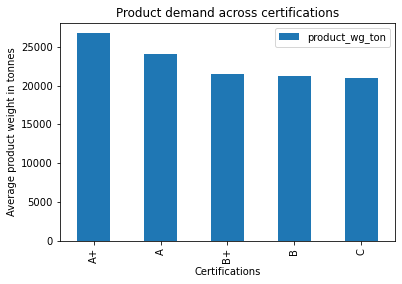

In [66]:
df1[
  ['approved_wh_govt_certificate','product_wg_ton']
  ].groupby('approved_wh_govt_certificate').mean().sort_values(by='product_wg_ton',ascending=False).plot(kind='bar')
plt.title('Product demand across certifications')
plt.xlabel('Certifications')
plt.ylabel('Average product weight in tonnes')
plt.show()

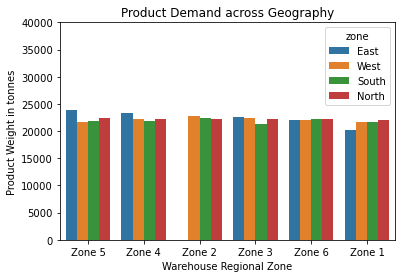

In [67]:
R1=df1[['zone','WH_regional_zone','product_wg_ton']].groupby(
         ['zone','WH_regional_zone']
         ).mean().sort_values(by='product_wg_ton',ascending=False).reset_index()
sns.barplot(x='WH_regional_zone', y='product_wg_ton', hue='zone', data=R1) 
plt.ylim(0,40000)
plt.title('Product Demand across Geography')
plt.xlabel('Warehouse Regional Zone')
plt.ylabel('Product Weight in tonnes')
plt.show()

In [68]:
df1[['zone','product_wg_ton']].groupby(['zone']).mean().sort_values(by='product_wg_ton',ascending=False).reset_index()

zone  product_wg_ton
0   East    22721.452214
1  North    22199.437926
2   West    22079.384189
3  South    21933.495913

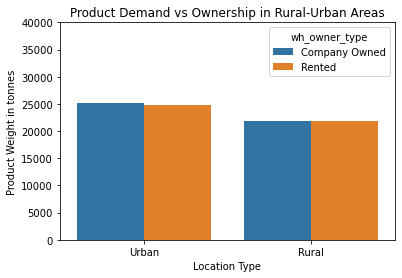

Location_type  wh_owner_type  product_wg_ton  distributor_num
0         Urban  Company Owned    25189.973588        41.882514
1         Urban         Rented    24787.989418        42.741799
2         Rural         Rented    21940.542044        42.498616
3         Rural  Company Owned    21763.743830        42.373157

In [69]:
R2=df1[['Location_type','wh_owner_type','product_wg_ton','distributor_num'] ].groupby(
    ['Location_type', 'wh_owner_type']).mean().sort_values(by='product_wg_ton',ascending=False).reset_index()
sns.barplot(x='Location_type', y='product_wg_ton', hue='wh_owner_type', data=R2)
plt.ylim(0,40000)
plt.title('Product Demand vs Ownership in Rural-Urban Areas')
plt.xlabel('Location Type')
plt.ylabel('Product Weight in tonnes')
plt.show()
R2

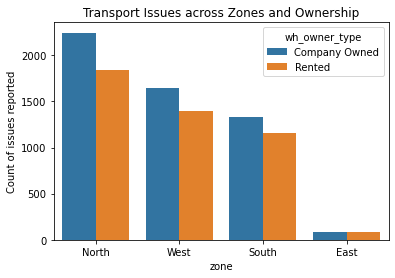

In [70]:
U1=df1[df1['transport_issue_l1y']>0][['wh_owner_type','zone']].value_counts().reset_index()
sns.barplot(data=U1,x='zone',y=0,hue='wh_owner_type')
plt.title('Transport Issues across Zones and Ownership')
plt.ylabel('Count of issues reported')
plt.show()

In [71]:
df1[['zone','WH_capacity_size']].value_counts()

zone   WH_capacity_size
North  Large               5490
West   Mid                 3554
South  Mid                 3211
North  Mid                 3001
West   Large               2990
North  Small               1787
South  Large               1615
       Small               1536
West   Small               1387
East   Mid                  254
       Small                101
       Large                 74
dtype: int64

In [72]:
round(df1[['zone','retail_shop_num','distributor_num','Competitor_in_mkt','govt_check_l3m']].groupby('zone').mean(),2)

retail_shop_num  distributor_num  Competitor_in_mkt  govt_check_l3m
zone                                                                      
East           4804.84            41.39               5.22           22.79
North          5046.63            42.40               2.98           19.93
South          5019.30            42.30               2.51           20.27
West           4889.61            42.59               3.62           15.98

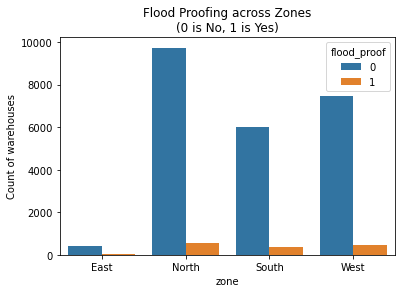

zone  flood_proof  Warehouse_Count
0   East            0              404
1   East            1               25
2  North            0             9737
3  North            1              541
4  South            0             6009
5  South            1              353
6   West            0             7484
7   West            1              447

In [73]:
R3=df[
  ['Ware_house_ID','zone','flood_proof']
  ].groupby(
      ['zone','flood_proof']
      ).nunique().reset_index().rename(columns={'Ware_house_ID':'Warehouse_Count'})
sns.barplot(data=R3,x='zone',hue='flood_proof',y='Warehouse_Count')
plt.ylabel('Count of warehouses')
plt.title('Flood Proofing across Zones\n(0 is No, 1 is Yes)')
plt.show()
R3

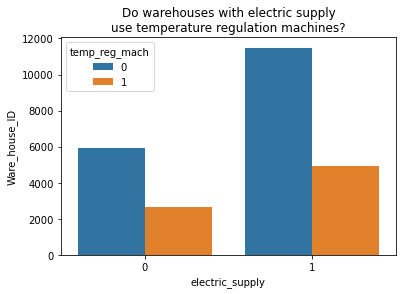

In [74]:
T1=df[
     ['Ware_house_ID','electric_supply','temp_reg_mach']
     ].groupby(
         ['electric_supply','temp_reg_mach']
         ).count().reset_index()
sns.barplot(x='electric_supply', y='Ware_house_ID', hue='temp_reg_mach', data=T1)
plt.title('Do warehouses with electric supply\nuse temperature regulation machines?')
plt.show()

In [75]:
df1.corr().round(3)

num_refill_req_l3m  transport_issue_l1y  \
num_refill_req_l3m                       1.000                0.019   
transport_issue_l1y                      0.019                1.000   
Competitor_in_mkt                        0.003               -0.006   
retail_shop_num                         -0.001               -0.002   
distributor_num                          0.004                0.009   
flood_impacted                          -0.011               -0.010   
flood_proof                             -0.001                0.000   
electric_supply                         -0.008               -0.009   
dist_from_hub                            0.000                0.014   
workers_num                             -0.014               -0.009   
wh_est_year                              0.015               -0.013   
storage_issue_reported_l3m              -0.007               -0.144   
temp_reg_mach                            0.261                0.018   
wh_breakdown_l3m                         0.001                0.013   
govt_check_l3m                          -0.003                0.002   
product_wg_ton                           0.001               -0.174   

                            Competitor_in_mkt  retail_shop_num  \
num_refill_req_l3m                      0.003           -0.001   
transport_issue_l1y                    -0.006           -0.002   
Competitor_in_mkt                       1.000           -0.157   
retail_shop_num                        -0.157            1.000   
distributor_num                        -0.001           -0.000   
flood_impacted                          0.009           -0.004   
flood_proof                            -0.003            0.007   
electric_supply                         0.002           -0.009   
dist_from_hub                           0.008            0.000   
workers_num                             0.000           -0.005   
wh_est_year                            -0.011            0.006   
storage_issue_reported_l3m              0.010           -0.007   
temp_reg_mach                           0.010           -0.001   
wh_breakdown_l3m                        0.013           -0.008   
govt_check_l3m                         -0.043            0.046   
product_wg_ton                          0.009           -0.007   

                            distributor_num  flood_impacted  flood_proof  \
num_refill_req_l3m                    0.004          -0.011       -0.001   
transport_issue_l1y                   0.009          -0.010        0.000   
Competitor_in_mkt                    -0.001           0.009       -0.003   
retail_shop_num                      -0.000          -0.004        0.007   
distributor_num                       1.000           0.005       -0.003   
flood_impacted                        0.005           1.000        0.107   
flood_proof                          -0.003           0.107        1.000   
electric_supply                       0.000           0.165        0.115   
dist_from_hub                        -0.012           0.001       -0.005   
workers_num                          -0.015           0.168        0.041   
wh_est_year                          -0.012          -0.001       -0.003   
storage_issue_reported_l3m            0.003          -0.003       -0.003   
temp_reg_mach                         0.003          -0.009        0.006   
wh_breakdown_l3m                      0.004          -0.002       -0.005   
govt_check_l3m                       -0.008           0.001       -0.004   
product_wg_ton                        0.005          -0.002       -0.000   

                            electric_supply  dist_from_hub  workers_num  \
num_refill_req_l3m                   -0.008          0.000       -0.014   
transport_issue_l1y                  -0.009          0.014       -0.009   
Competitor_in_mkt                     0.002          0.008        0.000   
retail_shop_num                      -0.009          0.000       -0.005   
distributor_num              

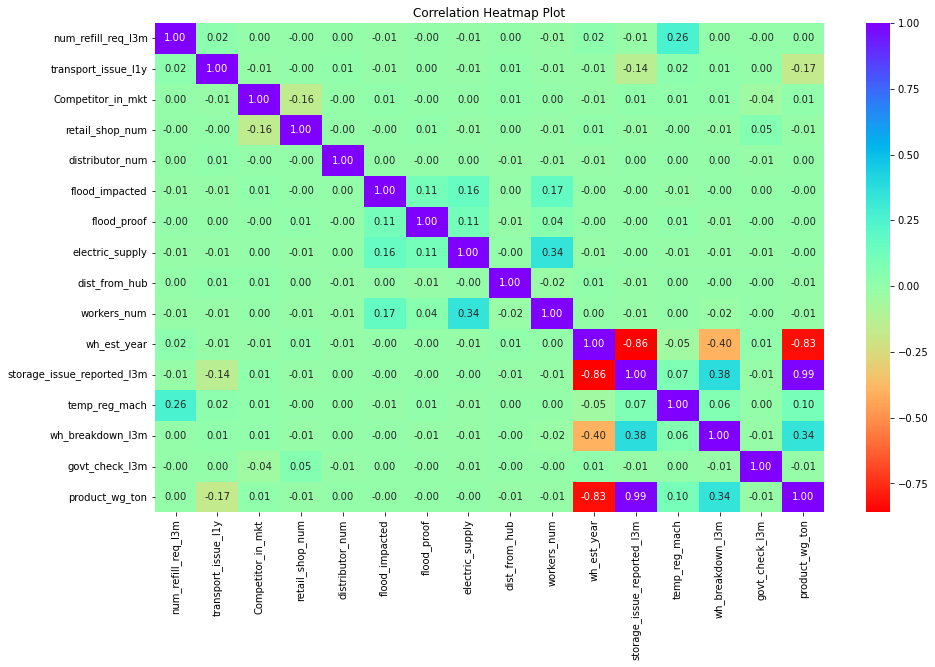

In [76]:
plt.figure(figsize=(15,9))
sns.heatmap(round(df1.corr(),2),fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot')
plt.show()

In [77]:
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

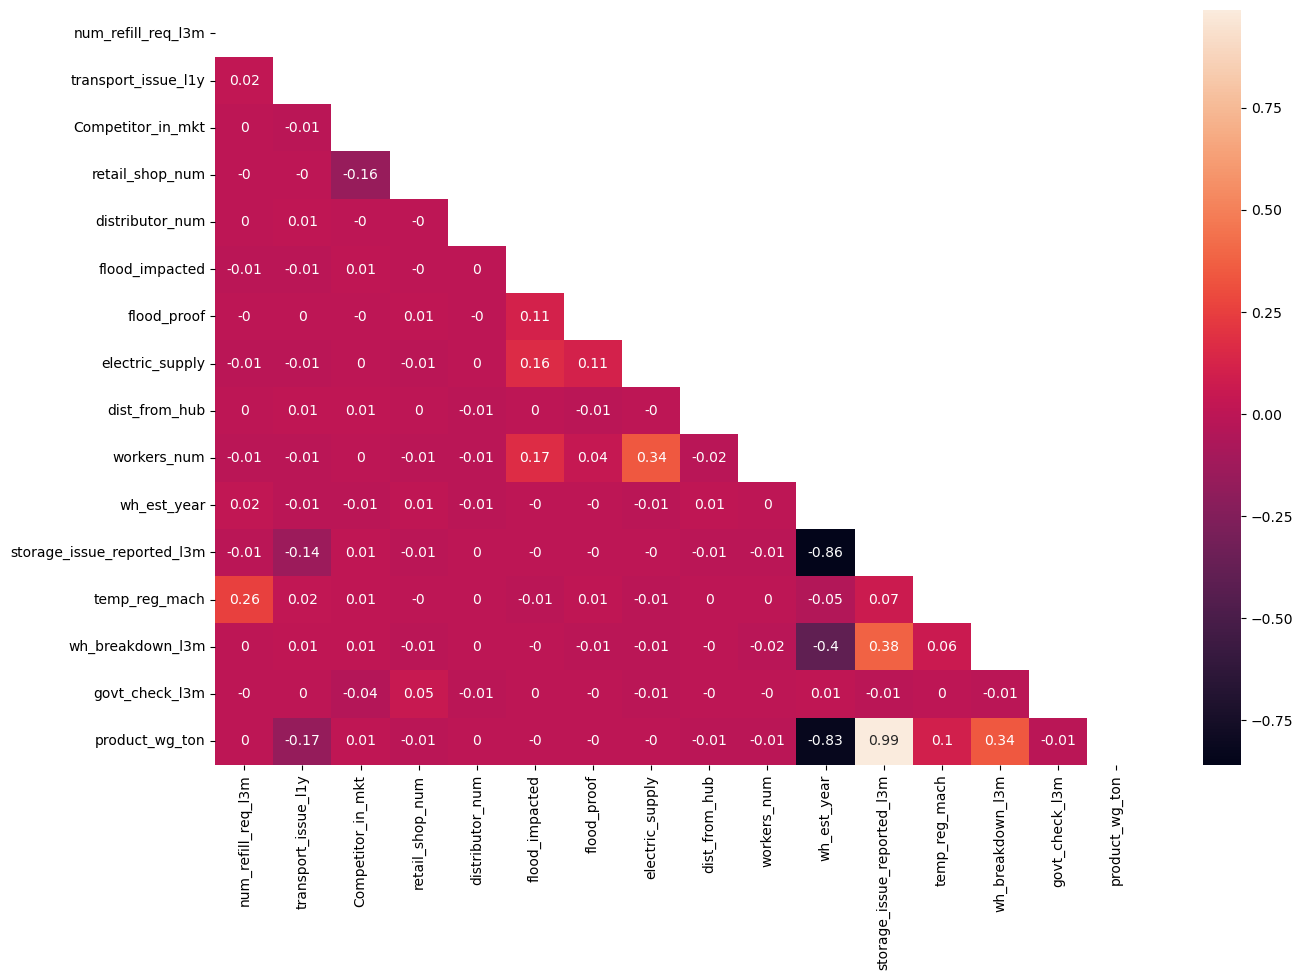

In [78]:
plt.figure(figsize=(15,10),dpi=100)
sns.heatmap(round(corr,2),mask=mask,annot=True)
plt.show()

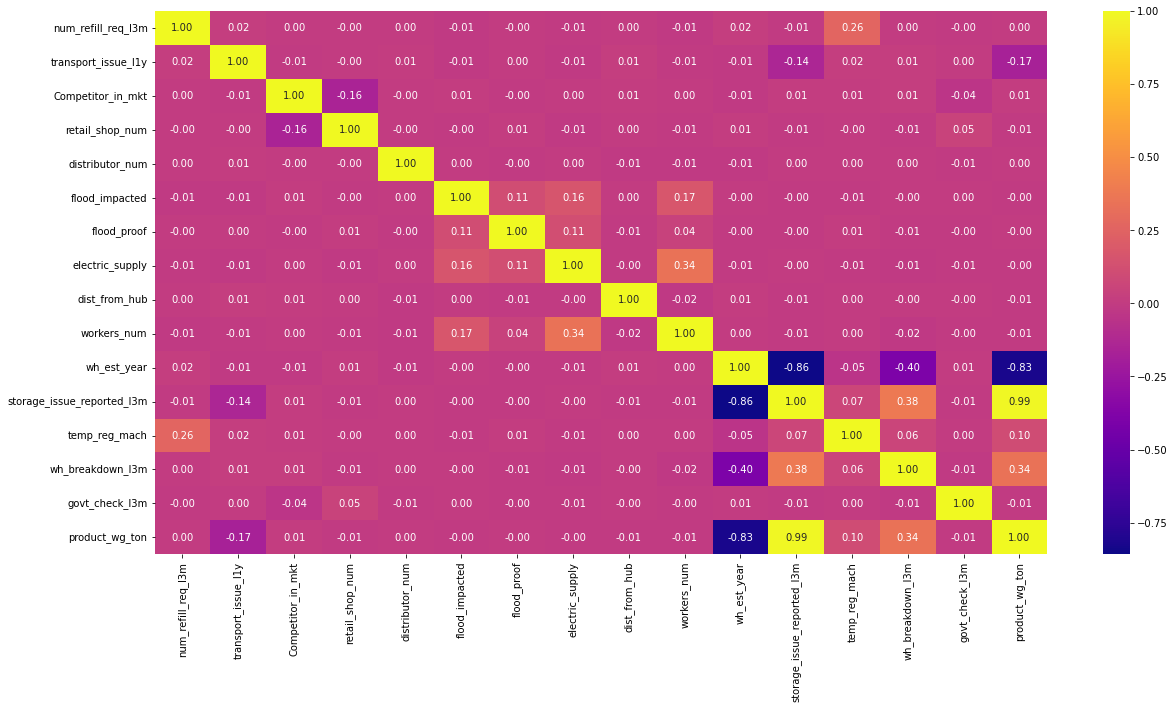

In [79]:
plt.subplots(figsize = (20,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

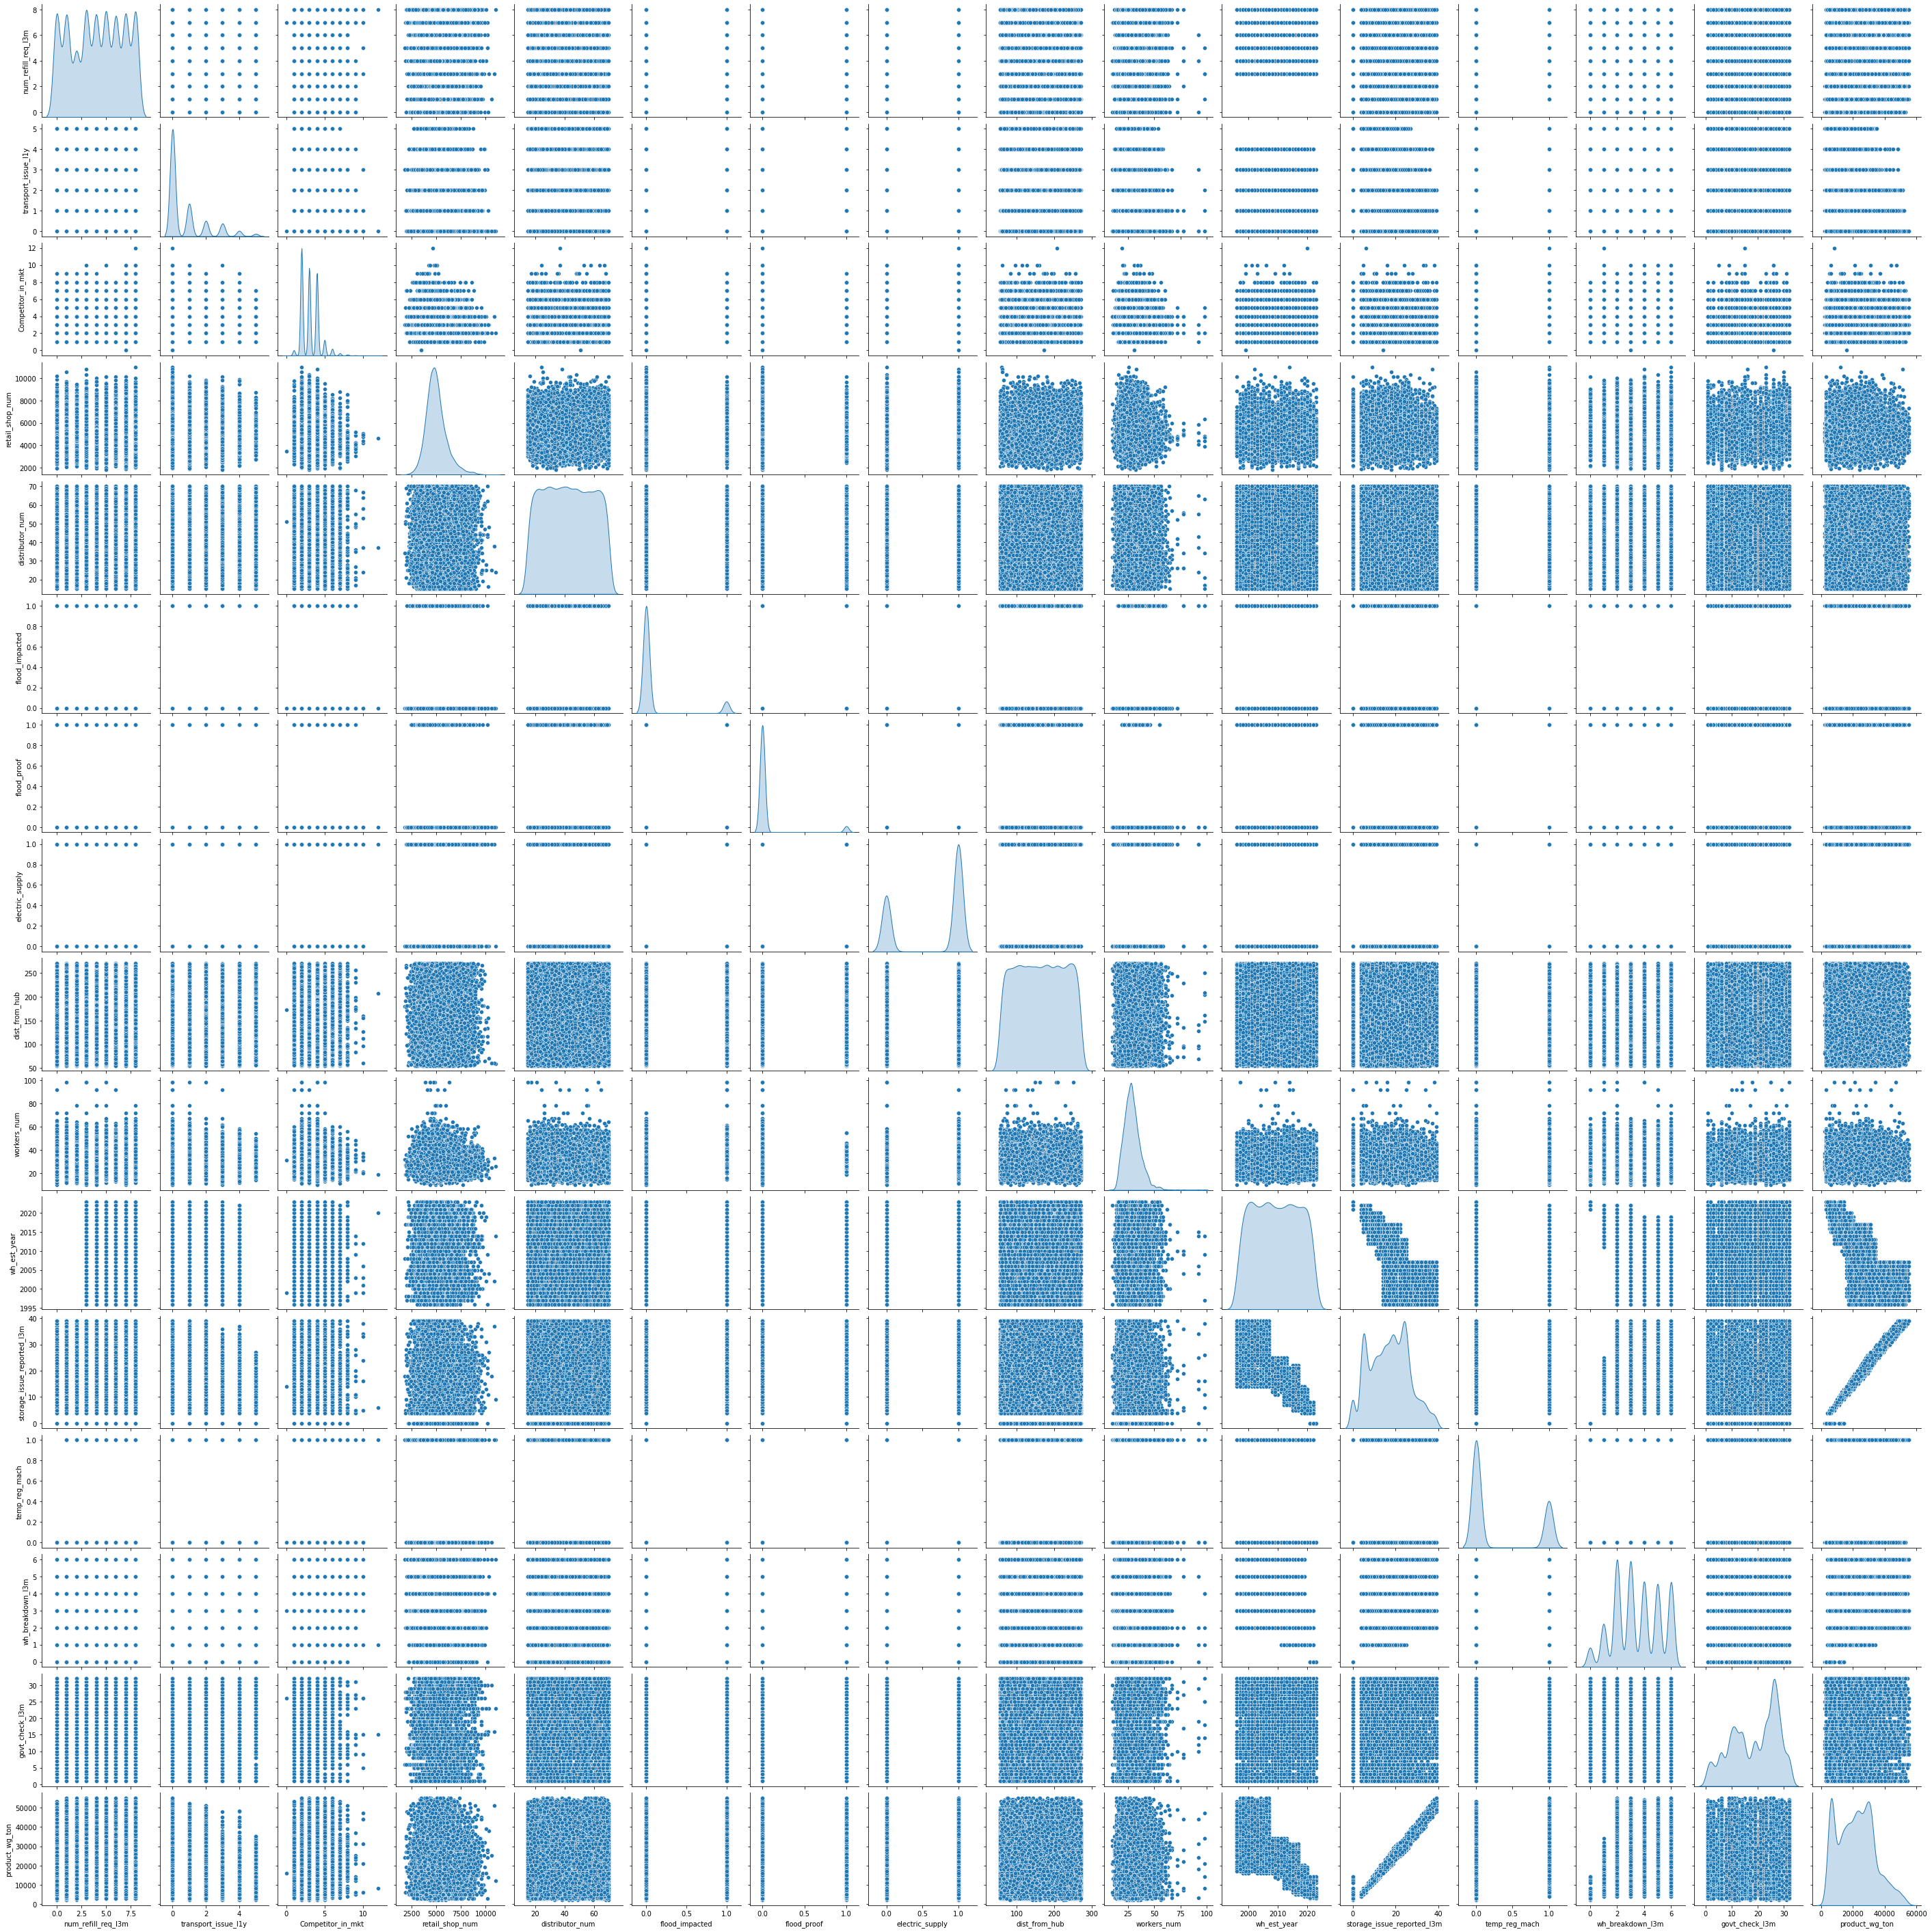

In [80]:
sns.pairplot(df1,diag_kind='kde');

### Outlier Check:

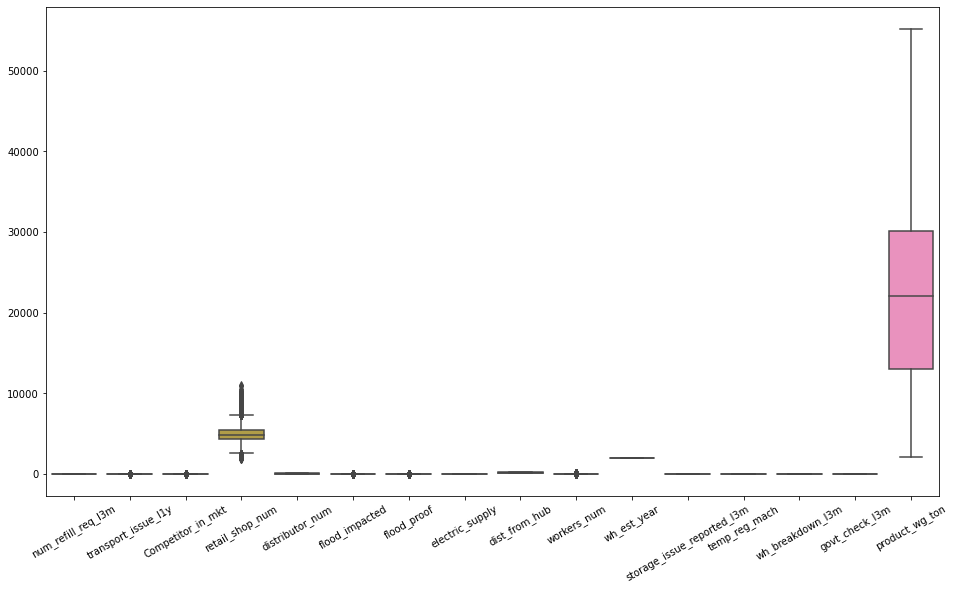

In [81]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=df1);
plt.xticks(rotation=30);
plt.savefig('box.jpg', bbox_inches='tight');

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


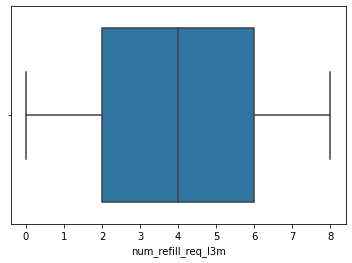

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


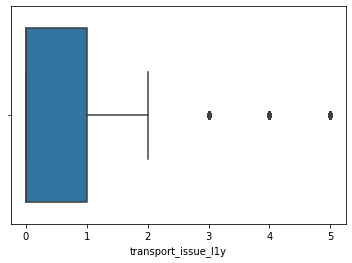

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


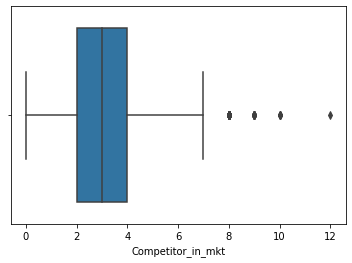

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


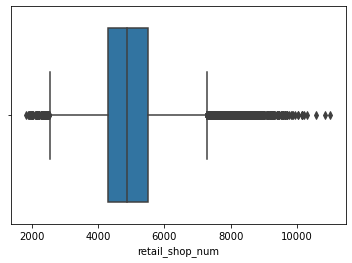

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


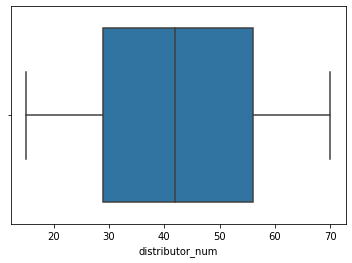

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


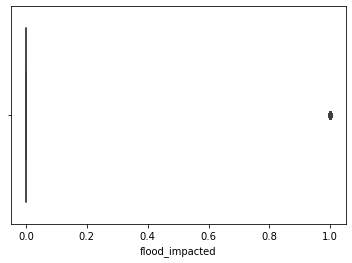

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


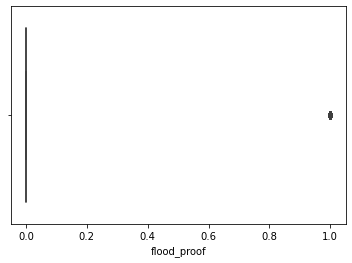

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


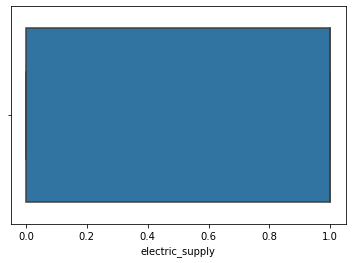

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


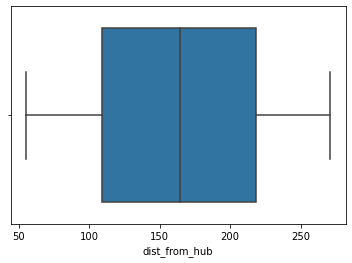

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


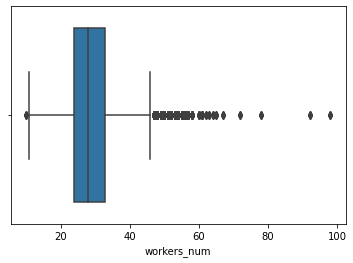

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


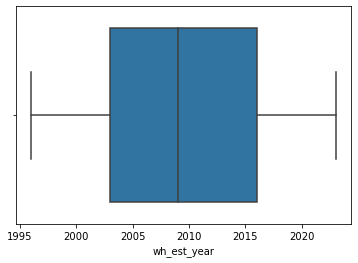

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


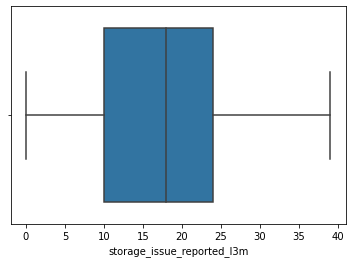

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


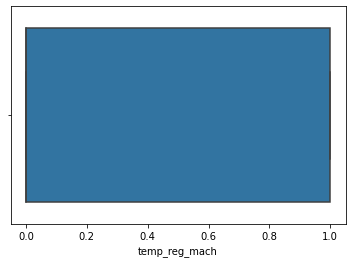

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


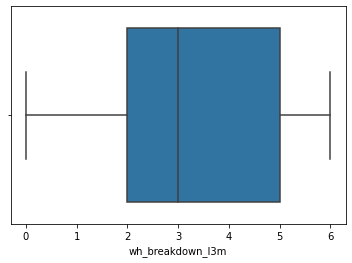

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


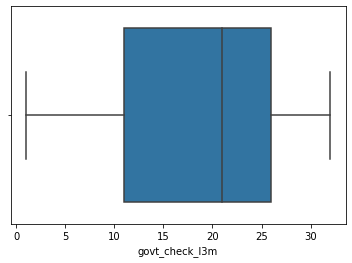

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


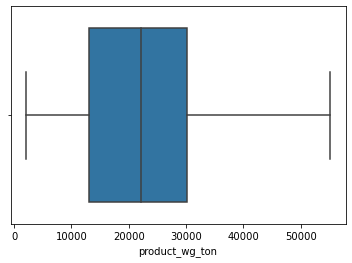

In [82]:
cols = ['num_refill_req_l3m','transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
        'flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num','wh_est_year',
        'storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','govt_check_l3m','product_wg_ton']
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

In [83]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [84]:
for column in df1[cols].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


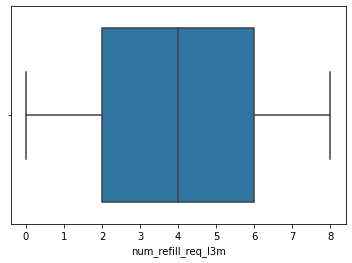

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


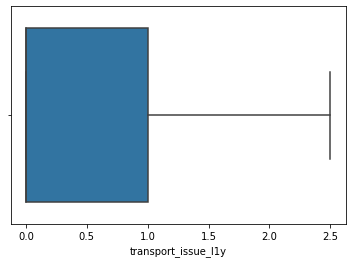

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


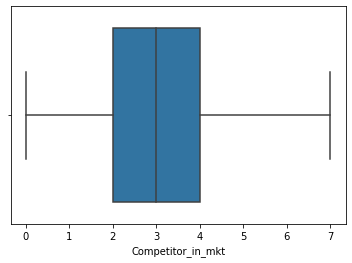

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


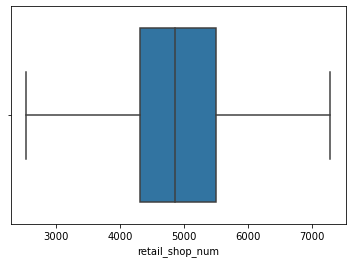

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


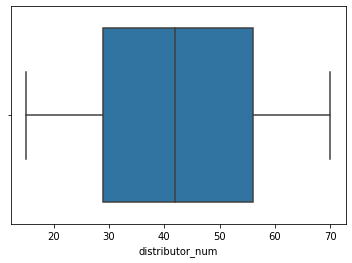

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


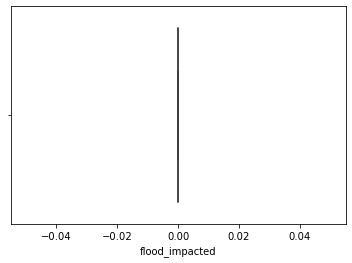

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


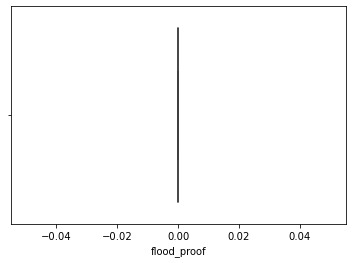

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


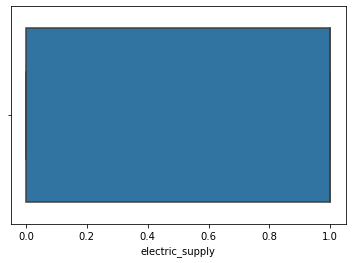

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


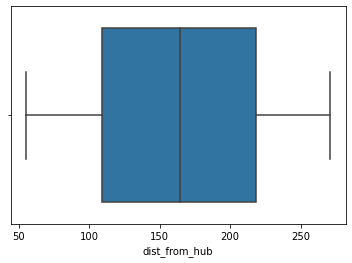

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


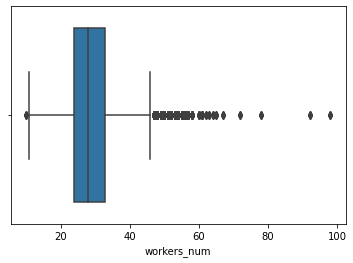

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


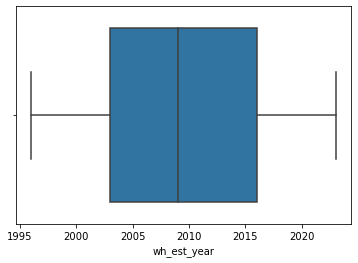

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


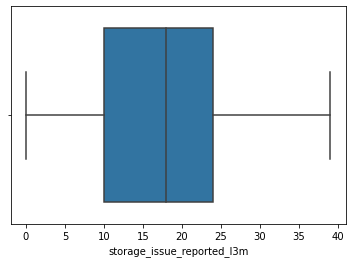

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


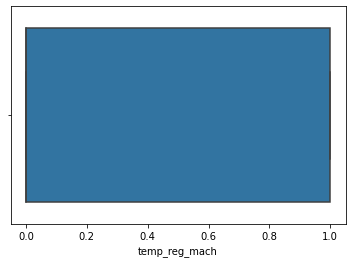

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


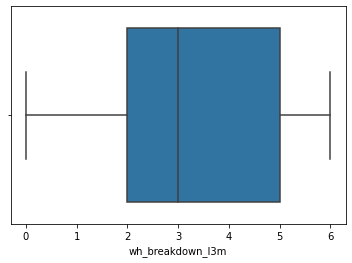

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


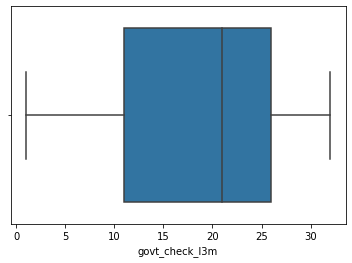

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


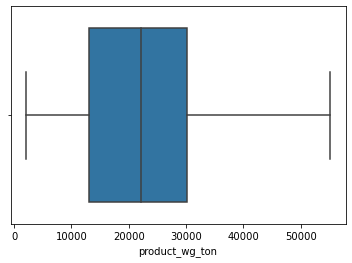

In [85]:
cols = ['num_refill_req_l3m','transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
        'flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num','wh_est_year',
        'storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','govt_check_l3m','product_wg_ton']
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

In [86]:
### After treating Outliers:

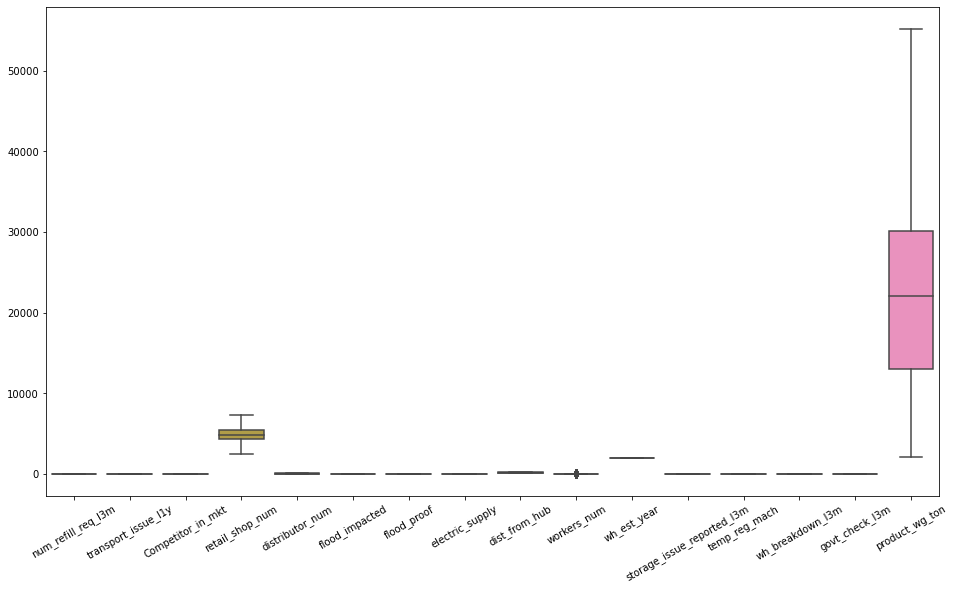

In [87]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=df1);
plt.xticks(rotation=30);
plt.savefig('box.jpg', bbox_inches='tight');

### Checking missing values:

In [88]:
df1.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

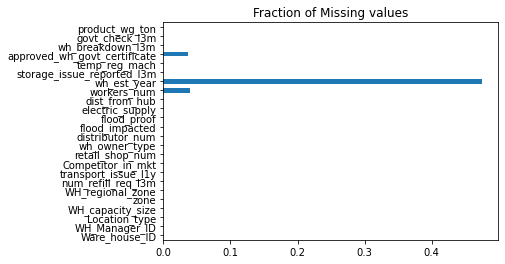

In [89]:
((df.isnull().sum())/df.shape[0]).plot(kind='barh')
plt.title('Fraction of Missing values')
plt.show()

In [90]:
df1.isnull().sum()/df1.isnull().sum().sum()*100

Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      7.184847
wh_est_year                     86.225415
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     6.589738
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0.000000
dtype: float64

### Missing Value Treatment:

In [91]:
df1.isnull().sum().sort_values(ascending = False)/df1.index.size

wh_est_year                     0.47524
workers_num                     0.03960
approved_wh_govt_certificate    0.03632
Location_type                   0.00000
WH_capacity_size                0.00000
govt_check_l3m                  0.00000
wh_breakdown_l3m                0.00000
temp_reg_mach                   0.00000
storage_issue_reported_l3m      0.00000
dist_from_hub                   0.00000
electric_supply                 0.00000
flood_proof                     0.00000
flood_impacted                  0.00000
distributor_num                 0.00000
wh_owner_type                   0.00000
retail_shop_num                 0.00000
Competitor_in_mkt               0.00000
transport_issue_l1y             0.00000
num_refill_req_l3m              0.00000
WH_regional_zone                0.00000
zone                            0.00000
product_wg_ton                  0.00000
dtype: float64

Simple Imputer

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

In [92]:
df2=pd.get_dummies(data=df1,columns=['Location_type', 'WH_capacity_size','zone', 'WH_regional_zone','wh_owner_type','approved_wh_govt_certificate'],drop_first=True)

In [93]:
df2.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0           4651.0             24.0             0.0          0.0   
1           6217.0             47.0             0.0          0.0   
2           4306.0             64.0             0.0          0.0   
3           6000.0             50.0             0.0          0.0   
4           4740.0             42.0             0.0          0.0   

   electric_supply  dist_from_hub  workers_num  ...  WH_regional_zone_Zone 2  \
0              1.0           91.0         29.0  ...                        0   
1              1.0          210.0         31.0  ...                        0   
2              0.0          161.0         37.0  ...                        1   
3              0.0          103.0         21.0  ...                        0   
4              1.0          112.0         25.0  ...                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  \
0                        1                     1   
1                        0                     0   
2                        0                     0   
3                        0                     1   
4                        0                     0   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                1                               0   
4                                0                               0   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
0                                0                               0  
1                                0                               0  
2                                0                               0  
3                                0                               0  
4                                0                               1  

[5 rows x 32 columns]

In [1]:
df2.isnull().sum()

NameError: name 'df2' is not defined

In [97]:
sub=df2.columns

In [98]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=50)
df_imputed = pd.DataFrame(imputer.fit_transform(df2.loc[:,sub]), columns = sub)

In [99]:
df_imputed.isnull().sum()

num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                        0
storage_issue_reported_l3m         0
temp_reg_mach                      0
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
Location_type_Urban                0
WH_capacity_size_Mid               0
WH_capacity_size_Small             0
zone_North                         0
zone_South                         0
zone_West                          0
WH_regional_zone_Zone 2            0
WH_regional_zone_Zone 3            0
WH_regional_zone_Zone 4            0
WH_regional_zone_Zone 5            0
WH_regional_zone_Zone 6            0
w

In [100]:
df_imputed.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0           4651.0             24.0             0.0          0.0   
1           6217.0             47.0             0.0          0.0   
2           4306.0             64.0             0.0          0.0   
3           6000.0             50.0             0.0          0.0   
4           4740.0             42.0             0.0          0.0   

   electric_supply  dist_from_hub  workers_num  ...  WH_regional_zone_Zone 2  \
0              1.0           91.0         29.0  ...                      0.0   
1              1.0          210.0         31.0  ...                      0.0   
2              0.0          161.0         37.0  ...                      1.0   
3              0.0          103.0         21.0  ...                      0.0   
4              1.0          112.0         25.0  ...                      0.0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      1.0   
2                      0.0                      0.0                      0.0   
3                      1.0                      0.0                      0.0   
4                      0.0                      0.0                      1.0   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  \
0                      1.0                   1.0   
1                      0.0                   0.0   
2                      0.0                   0.0   
3                      0.0                   1.0   
4                      0.0                   0.0   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              1.0                             0.0   
4                              0.0                             0.0   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
0                              0.0                             0.0  
1                              0.0                             0.0  
2                              0.0                             0.0  
3                              0.0                             0.0  
4                              0.0                             1.0  

[5 rows x 32 columns]

In [101]:
df_imputed['wh_est_year']

0        2013.02
1        2020.80
2        2009.92
3        2010.88
4        2009.00
          ...   
24995    2005.00
24996    2012.00
24997    2007.46
24998    2009.14
24999    2019.00
Name: wh_est_year, Length: 25000, dtype: float64

In [102]:
df_imputed['wh_est_year'] = df_imputed['wh_est_year'].apply(lambda x: math.trunc(x))

In [103]:
#creating new variable
df_imputed['wh_age'] = df_imputed['wh_est_year'].apply(lambda x: 2022 - x)
df_imputed['wh_age'].max()

26

In [104]:
bins= [0,5,10,15,20,25] #Since max value is 26 , bins are like that
labels = ['0-5','5-10','10-15','15-20','20-25']
df_imputed['AgeGroup'] = pd.cut(df_imputed['wh_age'], bins=bins, labels=labels, right=False)

In [105]:
df_imputed['AgeGroup'].value_counts()

10-15    5789
0-5      5155
5-10     4720
15-20    4411
20-25    4263
Name: AgeGroup, dtype: int64

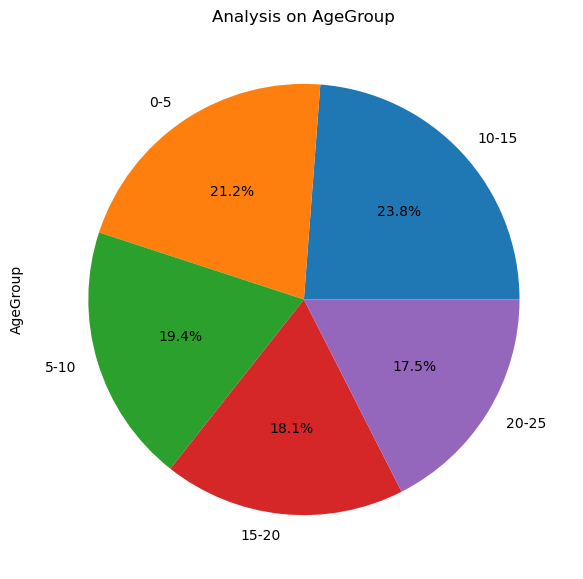

In [106]:
df_imputed['AgeGroup'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title('Analysis on AgeGroup')
plt.show()

In [107]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   num_refill_req_l3m               25000 non-null  float64 
 1   transport_issue_l1y              25000 non-null  float64 
 2   Competitor_in_mkt                25000 non-null  float64 
 3   retail_shop_num                  25000 non-null  float64 
 4   distributor_num                  25000 non-null  float64 
 5   flood_impacted                   25000 non-null  float64 
 6   flood_proof                      25000 non-null  float64 
 7   electric_supply                  25000 non-null  float64 
 8   dist_from_hub                    25000 non-null  float64 
 9   workers_num                      25000 non-null  float64 
 10  wh_est_year                      25000 non-null  int64   
 11  storage_issue_reported_l3m       25000 non-null  float64 
 12  temp

In [108]:
df_new=df_imputed.copy()

In [109]:
df_imputed.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type_Urban',
       'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C', 'wh_age', 'AgeGroup'],
      dtype='object')

In [110]:
df_new= pd.get_dummies(df_new,columns=['AgeGroup'],drop_first=True)

In [111]:
df_new = df_new.drop(['wh_age','wh_est_year'],axis=1) # these variables are not required as we have already created new column age grp

In [112]:
df_new.columns = df_new.columns.str.replace(' ', '_').str.replace('+','plus').str.replace('-', 'to')

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_7416\1225795677.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new.columns = df_new.columns.str.replace(' ', '_').str.replace('+','plus').str.replace('-', 'to')


In [113]:
df_new.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0           4651.0             24.0             0.0          0.0   
1           6217.0             47.0             0.0          0.0   
2           4306.0             64.0             0.0          0.0   
3           6000.0             50.0             0.0          0.0   
4           4740.0             42.0             0.0          0.0   

   electric_supply  dist_from_hub  workers_num  ...  WH_regional_zone_Zone_6  \
0              1.0           91.0         29.0  ...                      1.0   
1              1.0          210.0         31.0  ...                      0.0   
2              0.0          161.0         37.0  ...                      0.0   
3              0.0          103.0         21.0  ...                      0.0   
4              1.0          112.0         25.0  ...                      0.0   

   wh_owner_type_Rented  approved_wh_govt_certificate_Aplus  \
0                   1.0                                 0.0   
1                   0.0                                 0.0   
2                   0.0                                 0.0   
3                   1.0                                 1.0   
4                   0.0                                 0.0   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_Bplus  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 0.0   

   approved_wh_govt_certificate_C  AgeGroup_5to10  AgeGroup_10to15  \
0                             0.0               1                0   
1                             0.0               0                0   
2                             0.0               0                1   
3                             0.0               0                1   
4                             1.0               0                1   

   AgeGroup_15to20  AgeGroup_20to25  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 35 columns]

In [114]:
df_x = df_new.drop('product_wg_ton',axis=1)
df_y = df_new['product_wg_ton']

In [115]:
#df_x = df_x.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [116]:
df_x.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0           4651.0             24.0             0.0          0.0   
1           6217.0             47.0             0.0          0.0   
2           4306.0             64.0             0.0          0.0   
3           6000.0             50.0             0.0          0.0   
4           4740.0             42.0             0.0          0.0   

   electric_supply  dist_from_hub  workers_num  ...  WH_regional_zone_Zone_6  \
0              1.0           91.0         29.0  ...                      1.0   
1              1.0          210.0         31.0  ...                      0.0   
2              0.0          161.0         37.0  ...                      0.0   
3              0.0          103.0         21.0  ...                      0.0   
4              1.0          112.0         25.0  ...                      0.0   

   wh_owner_type_Rented  approved_wh_govt_certificate_Aplus  \
0                   1.0                                 0.0   
1                   0.0                                 0.0   
2                   0.0                                 0.0   
3                   1.0                                 1.0   
4                   0.0                                 0.0   

   approved_wh_govt_certificate_B  approved_wh_govt_certificate_Bplus  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 0.0   

   approved_wh_govt_certificate_C  AgeGroup_5to10  AgeGroup_10to15  \
0                             0.0               1                0   
1                             0.0               0                0   
2                             0.0               0                1   
3                             0.0               0                1   
4                             1.0               0                1   

   AgeGroup_15to20  AgeGroup_20to25  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 34 columns]

### Calculating the VIF

In [117]:
df_x = df_new.drop(['product_wg_ton'],axis=1)
df_y = df_new['product_wg_ton']

In [118]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
vif["Features"] = df_x.columns
round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2)

C:\Users\VIJAY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\VIJAY\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF_Factor                            Features
0          inf             WH_regional_zone_Zone_2
1          inf             WH_regional_zone_Zone_4
2          inf             WH_regional_zone_Zone_3
3          inf                WH_capacity_size_Mid
4        24.25                     retail_shop_num
5        16.59                          zone_North
6        16.48          storage_issue_reported_l3m
7        15.96                         workers_num
8        12.78                           zone_West
9        10.97                          zone_South
10        9.27                   Competitor_in_mkt
11        7.71                     distributor_num
12        7.55                       dist_from_hub
13        7.07                      govt_check_l3m
14        6.55             WH_regional_zone_Zone_6
15        6.51                    wh_breakdown_l3m
16        5.37             WH_regional_zone_Zone_5
17        4.94                     AgeGroup_20to25
18        4.09                     AgeGroup_15to20
19        3.77                  num_refill_req_l3m
20        3.39                     electric_supply
21        3.30                     AgeGroup_10to15
22        2.79              WH_capacity_size_Small
23        2.19  approved_wh_govt_certificate_Aplus
24        2.11                      AgeGroup_5to10
25        2.00      approved_wh_govt_certificate_C
26        1.98                       temp_reg_mach
27        1.95                wh_owner_type_Rented
28        1.92  approved_wh_govt_certificate_Bplus
29        1.89      approved_wh_govt_certificate_B
30        1.56                 transport_issue_l1y
31        1.10                 Location_type_Urban
32         NaN                      flood_impacted
33         NaN                         flood_proof

In [119]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [120]:
import dataframe_image as dfi
dfi.export(round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2), "VIF_all.png")

### now we we will remove the variables at the top "WH_regional_zone_Zone_2"and run VIF again to see the multicolineratity

In [121]:
df_x1 = df_x.drop(['WH_regional_zone_Zone_2'],axis=1)
df_y = df_new['product_wg_ton']

In [122]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x1.values, i) for i in range(df_x1.shape[1])]
vif["Features"] = df_x1.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

C:\Users\VIJAY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF_Factor                            Features
0    24.253115                     retail_shop_num
1    16.594933                          zone_North
2    16.480537          storage_issue_reported_l3m
3    15.957695                         workers_num
4    13.332287                WH_capacity_size_Mid
5    12.780426                           zone_West
6    10.971507                          zone_South
7     9.274130                   Competitor_in_mkt
8     7.705622                     distributor_num
9     7.548241                       dist_from_hub
10    7.065392                      govt_check_l3m
11    6.549216             WH_regional_zone_Zone_6
12    6.507590                    wh_breakdown_l3m
13    5.371667             WH_regional_zone_Zone_5
14    4.941920                     AgeGroup_20to25
15    4.091906                     AgeGroup_15to20
16    3.772057                  num_refill_req_l3m
17    3.392583                     electric_supply
18    3.296361                     AgeGroup_10to15
19    2.790256              WH_capacity_size_Small
20    2.586784             WH_regional_zone_Zone_4
21    2.193408  approved_wh_govt_certificate_Aplus
22    2.114520                      AgeGroup_5to10
23    2.067011             WH_regional_zone_Zone_3
24    1.995824      approved_wh_govt_certificate_C
25    1.977880                       temp_reg_mach
26    1.949123                wh_owner_type_Rented
27    1.917901  approved_wh_govt_certificate_Bplus
28    1.893590      approved_wh_govt_certificate_B
29    1.562373                 transport_issue_l1y
30    1.099156                 Location_type_Urban
31         NaN                      flood_impacted
32         NaN                         flood_proof

Now we will remove variable "retail_shop_num" and run VIF again

In [123]:
df_x2 = df_x1.drop(['retail_shop_num'],axis=1)

In [124]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x2.values, i) for i in range(df_x2.shape[1])]
vif["Features"] = df_x2.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

C:\Users\VIJAY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF_Factor                            Features
0    16.460527          storage_issue_reported_l3m
1    15.749083                         workers_num
2    14.818427                          zone_North
3    12.758206                WH_capacity_size_Mid
4    11.550681                           zone_West
5    10.016456                          zone_South
6     9.273691                   Competitor_in_mkt
7     7.658046                     distributor_num
8     7.499363                       dist_from_hub
9     6.784058                      govt_check_l3m
10    6.503116                    wh_breakdown_l3m
11    6.311140             WH_regional_zone_Zone_6
12    5.134048             WH_regional_zone_Zone_5
13    4.941024                     AgeGroup_20to25
14    4.091814                     AgeGroup_15to20
15    3.765457                  num_refill_req_l3m
16    3.392443                     electric_supply
17    3.295747                     AgeGroup_10to15
18    2.623990              WH_capacity_size_Small
19    2.586515             WH_regional_zone_Zone_4
20    2.192947  approved_wh_govt_certificate_Aplus
21    2.113539                      AgeGroup_5to10
22    2.060165             WH_regional_zone_Zone_3
23    1.993434      approved_wh_govt_certificate_C
24    1.977880                       temp_reg_mach
25    1.944252                wh_owner_type_Rented
26    1.916077  approved_wh_govt_certificate_Bplus
27    1.891746      approved_wh_govt_certificate_B
28    1.561737                 transport_issue_l1y
29    1.099155                 Location_type_Urban
30         NaN                      flood_impacted
31         NaN                         flood_proof

Now we will try to remove the variable "workers_num,storage_issue_reported_l3m,zone_North" as its still showing VIF value greater than 10

In [125]:
df_x3 = df_x2.drop(['WH_capacity_size_Mid','workers_num','storage_issue_reported_l3m','zone_North'],axis=1)

In [126]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x3.values, i) for i in range(df_x3.shape[1])]
vif["Features"] = df_x3.columns
round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2)

C:\Users\VIJAY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF_Factor                            Features
0         8.55                   Competitor_in_mkt
1         6.87                     distributor_num
2         6.79                       dist_from_hub
3         6.17                    wh_breakdown_l3m
4         5.97                      govt_check_l3m
5         3.63                  num_refill_req_l3m
6         2.92                     electric_supply
7         2.57             WH_regional_zone_Zone_6
8         2.24                     AgeGroup_10to15
9         2.15  approved_wh_govt_certificate_Aplus
10        2.04             WH_regional_zone_Zone_4
11        2.03             WH_regional_zone_Zone_5
12        1.98                     AgeGroup_15to20
13        1.98                       temp_reg_mach
14        1.96                     AgeGroup_20to25
15        1.96                           zone_West
16        1.94                      AgeGroup_5to10
17        1.93      approved_wh_govt_certificate_C
18        1.89                wh_owner_type_Rented
19        1.86  approved_wh_govt_certificate_Bplus
20        1.84      approved_wh_govt_certificate_B
21        1.69             WH_regional_zone_Zone_3
22        1.66                          zone_South
23        1.61              WH_capacity_size_Small
24        1.52                 transport_issue_l1y
25        1.10                 Location_type_Urban
26         NaN                      flood_impacted
27         NaN                         flood_proof

In [127]:
import dataframe_image as dfi
dfi.export(round(vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True),2), "vif_sel1.png")

We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold other than 10. (it depends on the business requirements) now all the variables above have VIF values less than 10,will continue with these variables and so the model buliding

dropping the columns with VIF > 10

In [128]:
X= df_new.drop(['product_wg_ton','WH_capacity_size_Mid','retail_shop_num','workers_num','storage_issue_reported_l3m','zone_North'], axis=1)
Y= df_new['product_wg_ton']

In [129]:
X.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0             24.0             0.0          0.0              1.0   
1             47.0             0.0          0.0              1.0   
2             64.0             0.0          0.0              0.0   
3             50.0             0.0          0.0              0.0   
4             42.0             0.0          0.0              1.0   

   dist_from_hub  temp_reg_mach  wh_breakdown_l3m  ...  \
0           91.0            0.0               5.0  ...   
1          210.0            0.0               3.0  ...   
2          161.0            0.0               6.0  ...   
3          103.0            1.0               3.0  ...   
4          112.0            0.0               6.0  ...   

   WH_regional_zone_Zone_6  wh_owner_type_Rented  \
0                      1.0                   1.0   
1                      0.0                   0.0   
2                      0.0                   0.0   
3                      0.0                   1.0   
4                      0.0                   0.0   

   approved_wh_govt_certificate_Aplus  approved_wh_govt_certificate_B  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 1.0                             0.0   
4                                 0.0                             0.0   

   approved_wh_govt_certificate_Bplus  approved_wh_govt_certificate_C  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             1.0   

   AgeGroup_5to10  AgeGroup_10to15  AgeGroup_15to20  AgeGroup_20to25  
0               1                0                0                0  
1               0                0                0                0  
2               0                1                0                0  
3               0                1                0                0  
4               0                1                0                0  

[5 rows x 29 columns]

In [130]:
X.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'Location_type_Urban', 'WH_capacity_size_Small', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone_2', 'WH_regional_zone_Zone_3',
       'WH_regional_zone_Zone_4', 'WH_regional_zone_Zone_5',
       'WH_regional_zone_Zone_6', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_Aplus', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_Bplus', 'approved_wh_govt_certificate_C',
       'AgeGroup_5to10', 'AgeGroup_10to15', 'AgeGroup_15to20',
       'AgeGroup_20to25'],
      dtype='object')

### Train -Test Split

In [131]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [132]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (17500, 29)
The dimension of X_test is (7500, 29)


### Scaling

In [133]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [134]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [135]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=1)
dtr = tree.DecisionTreeRegressor(random_state=1)
lr = LinearRegression()
ls = Lasso(alpha=0.01)
rr = Ridge(alpha=0.01)

models=[rr,ls,lr,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr,rr,ls) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Ridge Regression','Lasso Regression','Linear Regression','Decision Tree Regressor','Random Forest Regressor','ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Ridge Regression         6307.426586  6110.813490        0.706616    0.718608
Lasso Regression         6307.426588  6110.812003        0.706616    0.718608
Linear Regression        6307.426585  6110.812300        0.706616    0.718608
Decision Tree Regressor     0.000000  8231.949333        1.000000    0.489354
Random Forest Regressor  2267.595432  5918.079818        0.962080    0.736078
ANN Regressor            6270.434832  6075.722585        0.710047    0.721830


### Linear Regression Coefficients

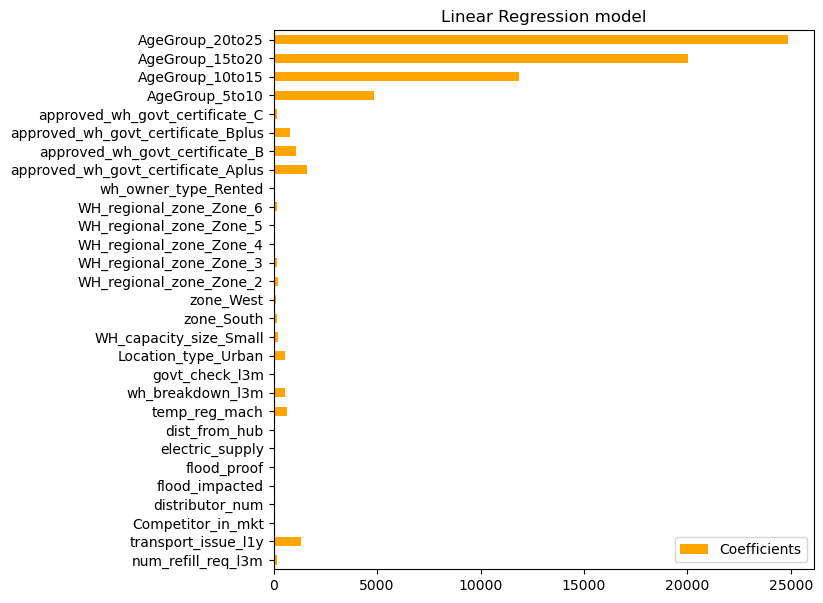

In [181]:
import matplotlib.pyplot as plt

features = pd.DataFrame(
   lr.coef_,
   columns=['Coefficients'], index=X_train.columns
)
features.Coefficients = features.Coefficients.abs()
features.plot(kind='barh', figsize=(9, 7),color="orange")
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

#### Ridge Regression Coefficients

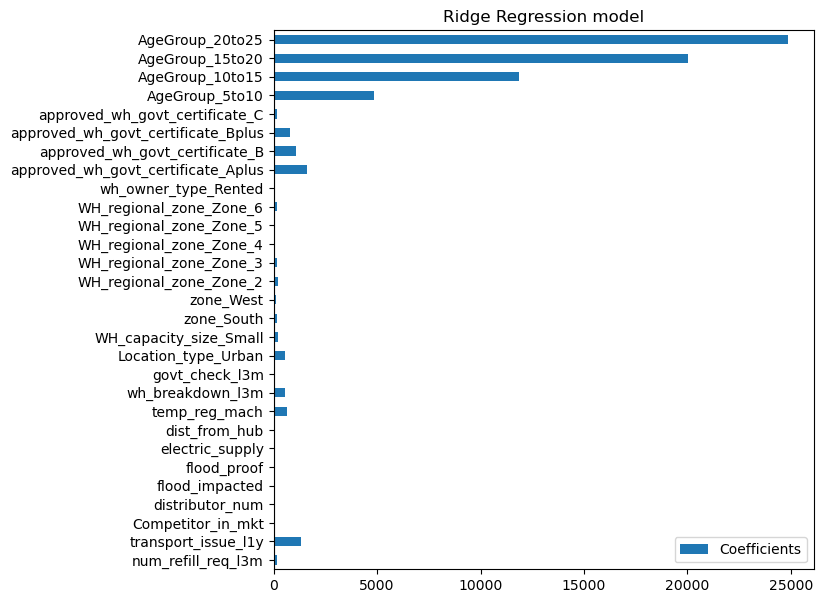

In [137]:
features_ridge = pd.DataFrame(
   rr.coef_,
   columns=['Coefficients'], index=X_train.columns
)
features_ridge.Coefficients = features_ridge.Coefficients.abs()
features_ridge.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### Lasso Regression Coefficients

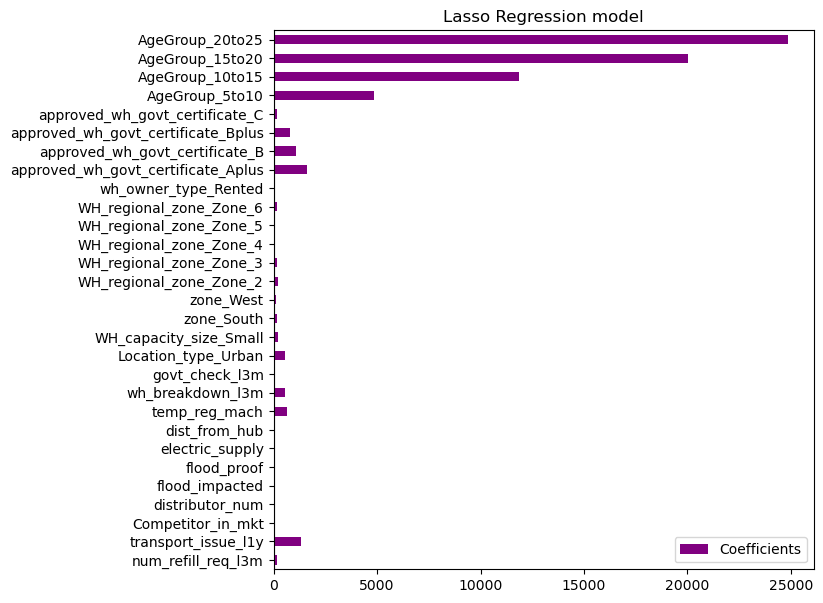

In [182]:
features_lasso = pd.DataFrame(
   ls.coef_,
   columns=['Coefficients'], index=X_train.columns
)
features_lasso.Coefficients = features_lasso.Coefficients.abs()
features_lasso.plot(kind='barh', figsize=(9, 7),color="Purple")
plt.title('Lasso Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### Random Forest Regression feature Importances

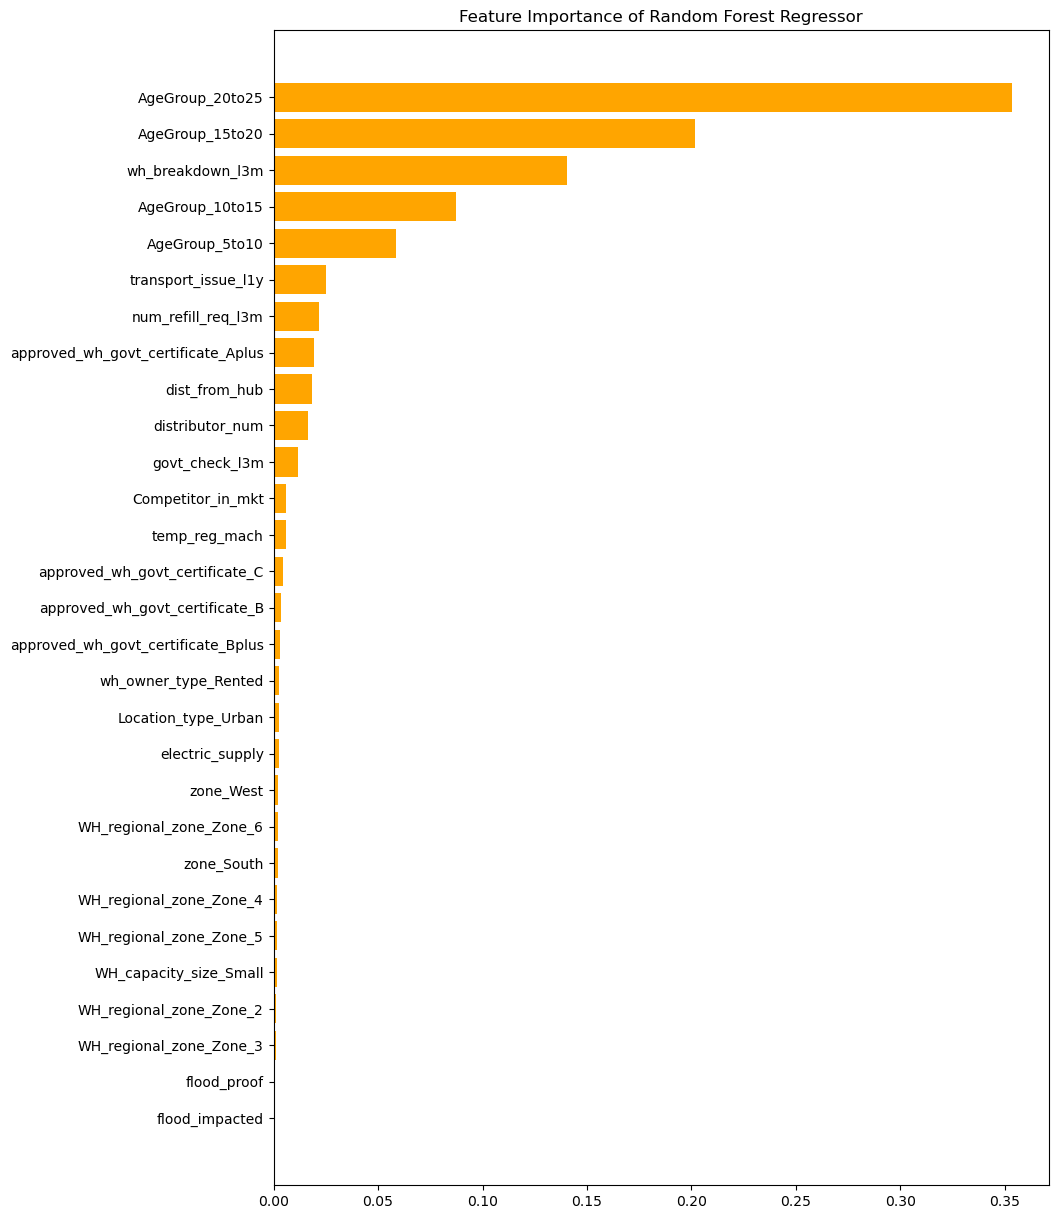

In [185]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_i = list(zip(features,rfr.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i],color="orange")
plt.title("Feature Importance of Random Forest Regressor")

plt.show()


### Decision Tree Regression feature Importances

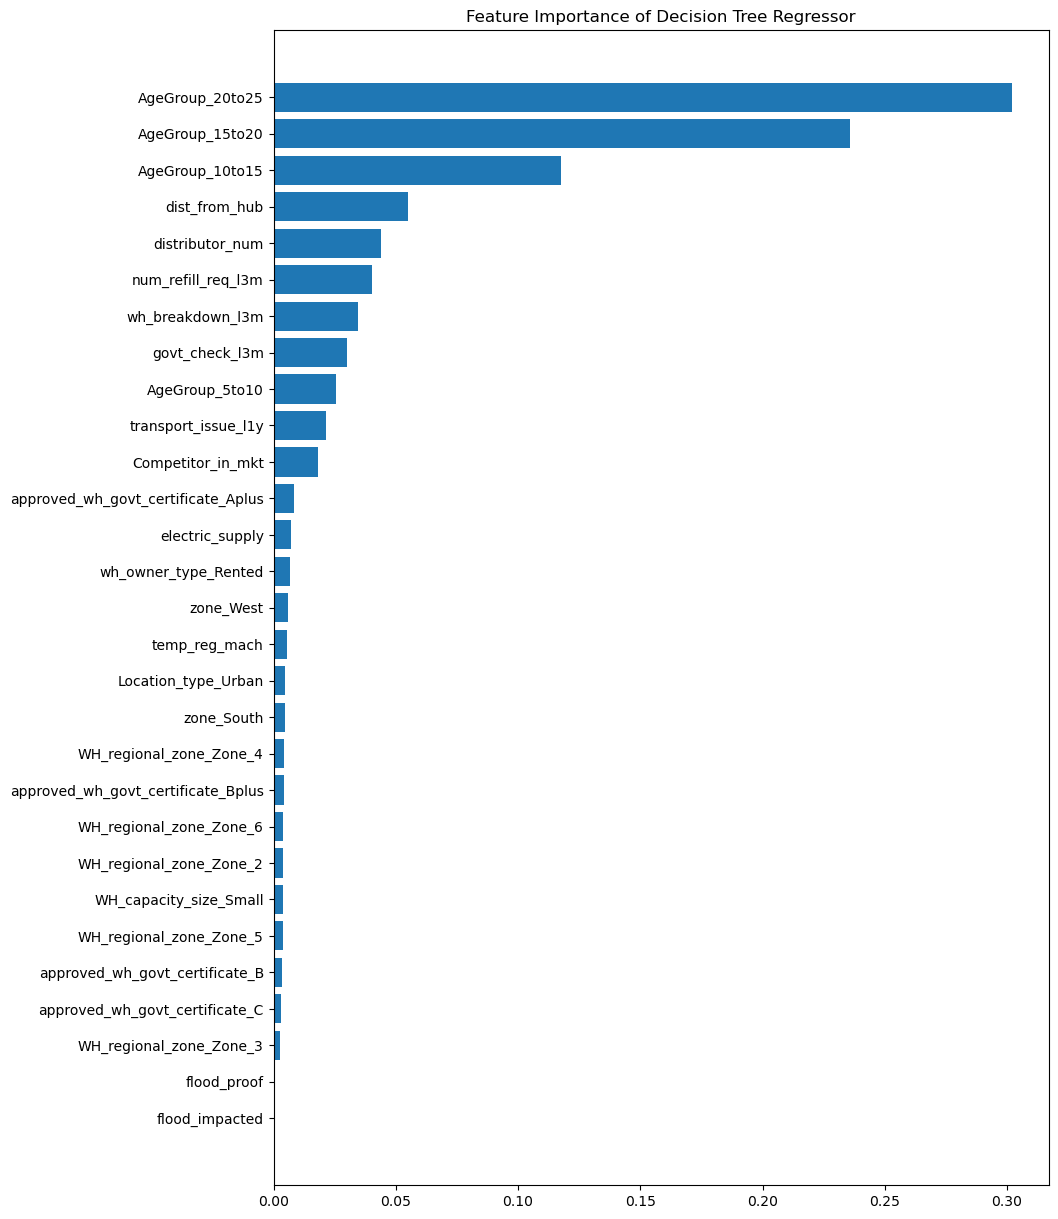

In [140]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_d = list(zip(features,dtr.feature_importances_))
f_d.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_d],[x[1] for x in f_d])
plt.title("Feature Importance of Decision Tree Regressor")

plt.show()

In [141]:
features_mlp = pd.DataFrame(
   annr.coefs_
)

C:\Users\VIJAY\anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [142]:
features_mlp

0
0  [[0.0667049296522757, 0.23402229869518626, 0.0...
1  [[4.004372323384772], [3.811858093489829], [3....

Regularization is used as optimization method. In regularization, same number of features are kept and magnitude of coefficients is reduced. Lasso is modification of linear regression where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros. Ridge takes a step further and penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.

In our results, we see the results are almost similar for linear, lasso and ridge regression. Since the features are selected using VIF method, lasso and ridge are performing same as linear regression.

Decision tree and Random Forest's nonlinear nature gives better results than linear regression. Decision tree's accuracy shows that it is overfitting, so does random forest's results shows.

Leanear regression and other methods can understand only linear relationships, to understand non-linear relationships ANN works better. Looking at the result ANN performs better than Linear and regularization methods. Real life data is supposed to have complex non-linear relationships, that's why ANN is giving better results than linear models.

But these results can be overfitting or underfitting. We can use grid search to tackle this problem.

### Linear Regression : Model 1

In [143]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)

LinearRegression()

In [144]:
# R square 
print('R square on Train data:',regression_model1.score(X_train, y_train))
print('R square on Test data:',regression_model1.score(X_test, y_test))

R square on Train data: 0.7066155029793613
R square on Test data: 0.7186077329230574


In [145]:
#RMSE on Training data
predict_train= regression_model1.predict(X_train)
np.sqrt(np.mean(np.square(predict_train - y_train)))

6307.426585379429

In [146]:
#RMSE on Testing data
predict_test= regression_model1.predict(X_test)
np.sqrt(np.mean(np.square(predict_test - y_test)))

6110.812300359226

In [147]:
# concatenate X and y into a single dataframe
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1=pd.concat([X_test, y_test], axis=1)
data_train1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
4289                  0.0                  2.0                4.0   
19621                 6.0                  2.0                3.0   
14965                 6.0                  0.0                4.0   
12321                 6.0                  1.0                3.0   
6269                  4.0                  2.5                3.0   

       distributor_num  flood_impacted  flood_proof  electric_supply  \
4289              43.0             0.0          0.0              1.0   
19621             59.0             0.0          0.0              1.0   
14965             39.0             0.0          0.0              1.0   
12321             54.0             0.0          0.0              1.0   
6269              23.0             0.0          0.0              1.0   

       dist_from_hub  temp_reg_mach  wh_breakdown_l3m  ...  \
4289           127.0            0.0               5.0  ...   
19621          248.0            1.0               3.0  ...   
14965           63.0            0.0               2.0  ...   
12321          260.0            0.0               2.0  ...   
6269           144.0            0.0               6.0  ...   

       wh_owner_type_Rented  approved_wh_govt_certificate_Aplus  \
4289                    1.0                                 0.0   
19621                   1.0                                 1.0   
14965                   1.0                                 0.0   
12321                   0.0                                 0.0   
6269                    0.0                                 0.0   

       approved_wh_govt_certificate_B  approved_wh_govt_certificate_Bplus  \
4289                              1.0                                 0.0   
19621                             0.0                                 0.0   
14965                             1.0                                 0.0   
12321                             1.0                                 0.0   
6269                              0.0                                 1.0   

       approved_wh_govt_certificate_C  AgeGroup_5to10  AgeGroup_10to15  \
4289                              0.0               0                1   
19621                             0.0               0                1   
14965                             0.0               0                0   
12321                             0.0               0                0   
6269                              0.0               0                0   

       AgeGroup_15to20  AgeGroup_20to25  product_wg_ton  
4289                 0                0         23086.0  
19621                0                0         19108.0  
14965                0                1         38125.0  
12321                1                0         33123.0  
6269                 0                0         26089.0  

[5 rows x 30 columns]

In [148]:
expr1= 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + Competitor_in_mkt + distributor_num + flood_impacted + flood_proof + electric_supply + dist_from_hub + temp_reg_mach + wh_breakdown_l3m + govt_check_l3m + Location_type_Urban +  WH_capacity_size_Small  + zone_South + zone_West + WH_regional_zone_Zone_2 + WH_regional_zone_Zone_3 + WH_regional_zone_Zone_4 + WH_regional_zone_Zone_5 + WH_regional_zone_Zone_6 + wh_owner_type_Rented + approved_wh_govt_certificate_Aplus + approved_wh_govt_certificate_B + approved_wh_govt_certificate_Bplus +approved_wh_govt_certificate_C+AgeGroup_5to10 +AgeGroup_10to15 +AgeGroup_15to20 + AgeGroup_20to25'

In [149]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr1, data = data_train1).fit()
lm1.params

Intercept                             8.887264e+03
num_refill_req_l3m                    1.492638e+02
transport_issue_l1y                  -1.325701e+03
Competitor_in_mkt                     2.488922e+00
distributor_num                      -6.172090e-01
flood_impacted                        3.466627e-11
flood_proof                           1.860253e-11
electric_supply                      -4.826377e+00
dist_from_hub                         3.043215e-01
temp_reg_mach                         6.278124e+02
wh_breakdown_l3m                      5.731248e+02
govt_check_l3m                        5.847524e-01
Location_type_Urban                   5.571003e+02
WH_capacity_size_Small               -2.088326e+02
zone_South                            1.583645e+02
zone_West                             1.352328e+02
WH_regional_zone_Zone_2               2.144721e+02
WH_regional_zone_Zone_3              -1.688942e+02
WH_regional_zone_Zone_4               1.592406e+01
WH_regional_zone_Zone_5        

In [150]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:15   Log-Likelihood:            -1.7795e+05
No. Observations:               17500   AIC:                         3.560e+05
Df Residuals:                   17472   BIC:                         3.562e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [151]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train1.drop('product_wg_ton',axis=1))-data_train1['product_wg_ton'])**2)
#Root Mean Squared Error - RMSE
np.sqrt(mse)

6307.426585379433

In [152]:
exp2= 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + temp_reg_mach + wh_breakdown_l3m + Location_type_Urban + approved_wh_govt_certificate_Aplus + approved_wh_govt_certificate_B + approved_wh_govt_certificate_Bplus +AgeGroup_5to10 + AgeGroup_10to15 + AgeGroup_15to20 + AgeGroup_20to25'

In [153]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= exp2, data = data_train1).fit()
lm2.params

Intercept                              8817.970896
num_refill_req_l3m                      150.161333
transport_issue_l1y                   -1327.954240
temp_reg_mach                           622.042858
wh_breakdown_l3m                        571.920227
Location_type_Urban                     543.919753
approved_wh_govt_certificate_Aplus     1715.145985
approved_wh_govt_certificate_B        -1002.871049
approved_wh_govt_certificate_Bplus     -691.472444
AgeGroup_5to10                         4830.390958
AgeGroup_10to15                       11833.099687
AgeGroup_15to20                       20037.363564
AgeGroup_20to25                       24853.847267
dtype: float64

In [154]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     3505.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:42:15   Log-Likelihood:            -1.7796e+05
No. Observations:               17500   AIC:                         3.559e+05
Df Residuals:                   17487   BIC:                         3.560e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [155]:
# Calculate MSE
mse = np.mean((lm2.predict(data_train1.drop('product_wg_ton',axis=1))-data_train1['product_wg_ton'])**2)
#Root Mean Squared Error - RMSE
np.sqrt(mse)

6310.408435567953

The R2 has no much change even after removing the variables which is p value less than 0.05

### Ensemble modelling

In [156]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [157]:
model_ABR = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
bagging= BaggingRegressor()
xgboost =xgb.XGBRegressor()

models=[model_ABR,gbr,bagging,xgboost]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['AdaBoostRegressor','GradientBoostingRegressor','BaggingRegressor','XGBRegressor']))

                            Train RMSE    Test RMSE  Training Score  \
AdaBoostRegressor          6942.130707  6849.012834        0.644599   
GradientBoostingRegressor  5967.896660  5819.524337        0.737351   
BaggingRegressor           2684.799615  6150.138886        0.946843   
XGBRegressor               4380.682706  5991.809046        0.858480   

                           Test Score  
AdaBoostRegressor            0.646516  
GradientBoostingRegressor    0.744795  
BaggingRegressor             0.714974  
XGBRegressor                 0.729461  


### ADABoost feature Importance

<AxesSubplot:>

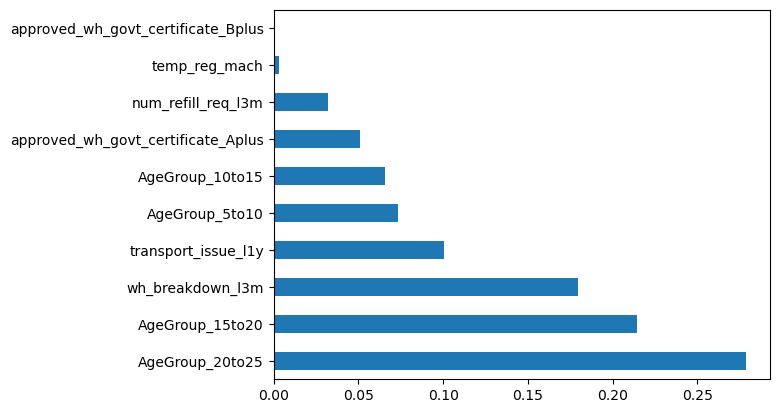

In [158]:
feature_importances_ada = pd.Series(model_ABR.feature_importances_ , index=X_train.columns)
feature_importances_ada.nlargest(10).plot(kind='barh')

### GradientBoosting feature Importance

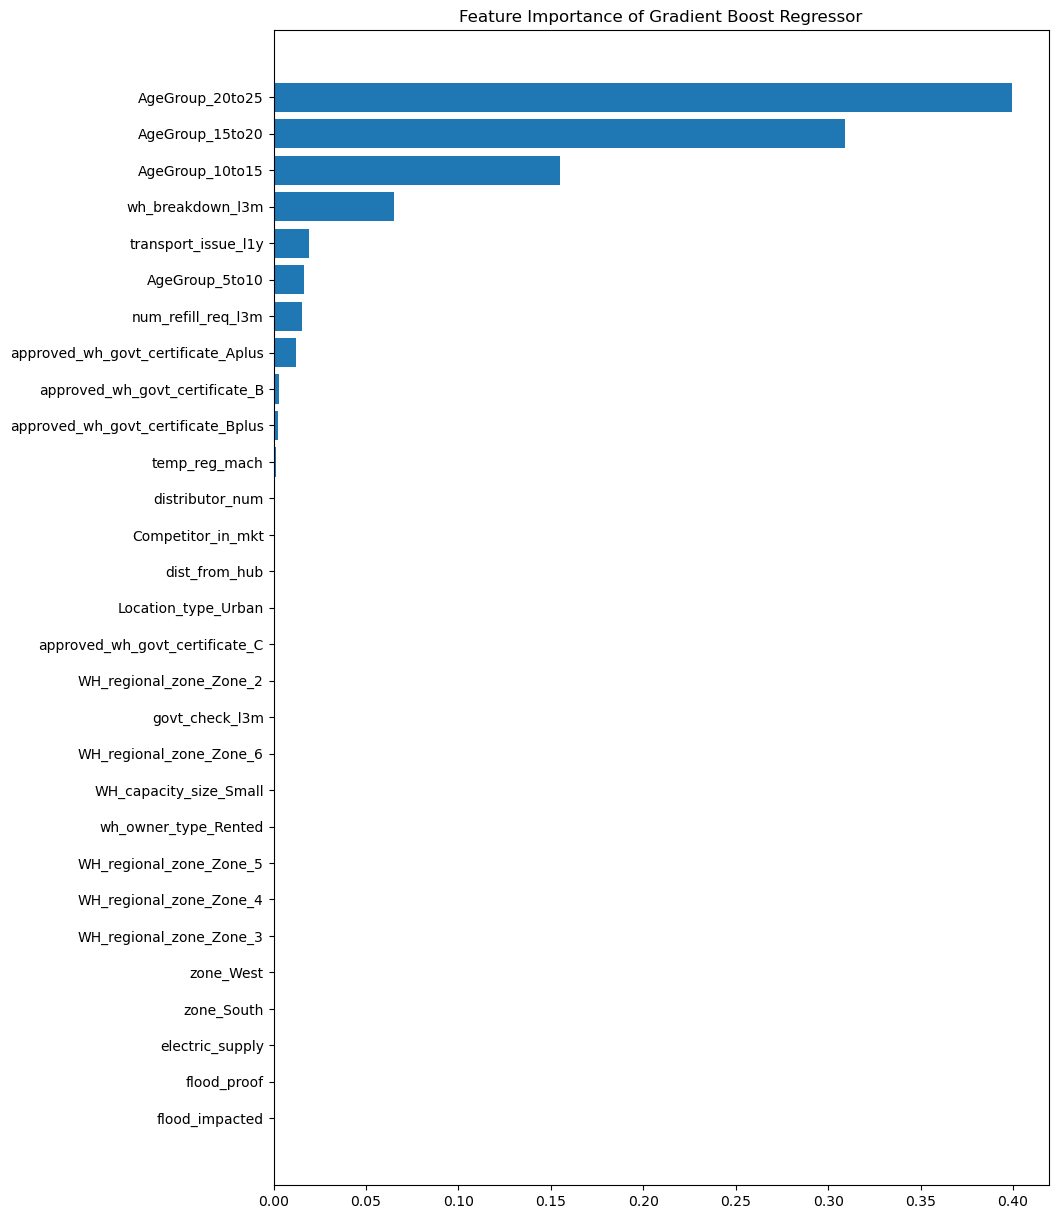

In [159]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_g = list(zip(features,gbr.feature_importances_))
f_g.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_g],[x[1] for x in f_g])
plt.title("Feature Importance of Gradient Boost Regressor")

plt.show()

### Bagging feature Importance

In [160]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging.estimators_
], axis=0)

feature_bg=pd.DataFrame(feature_importances,
   columns=['feature_importances'], index=X_train.columns)

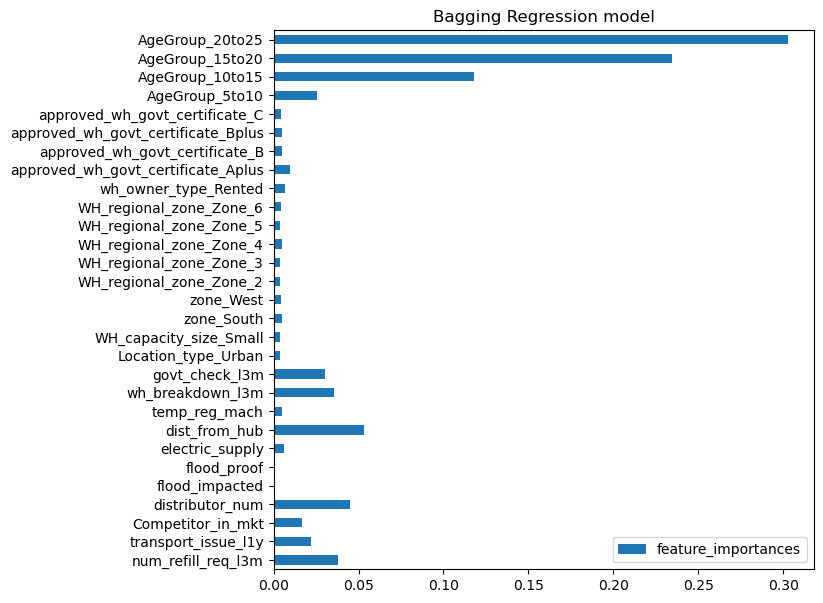

In [161]:
feature_bg.plot(kind='barh', figsize=(9, 7))
plt.title('Bagging Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### XGB Feature Importance

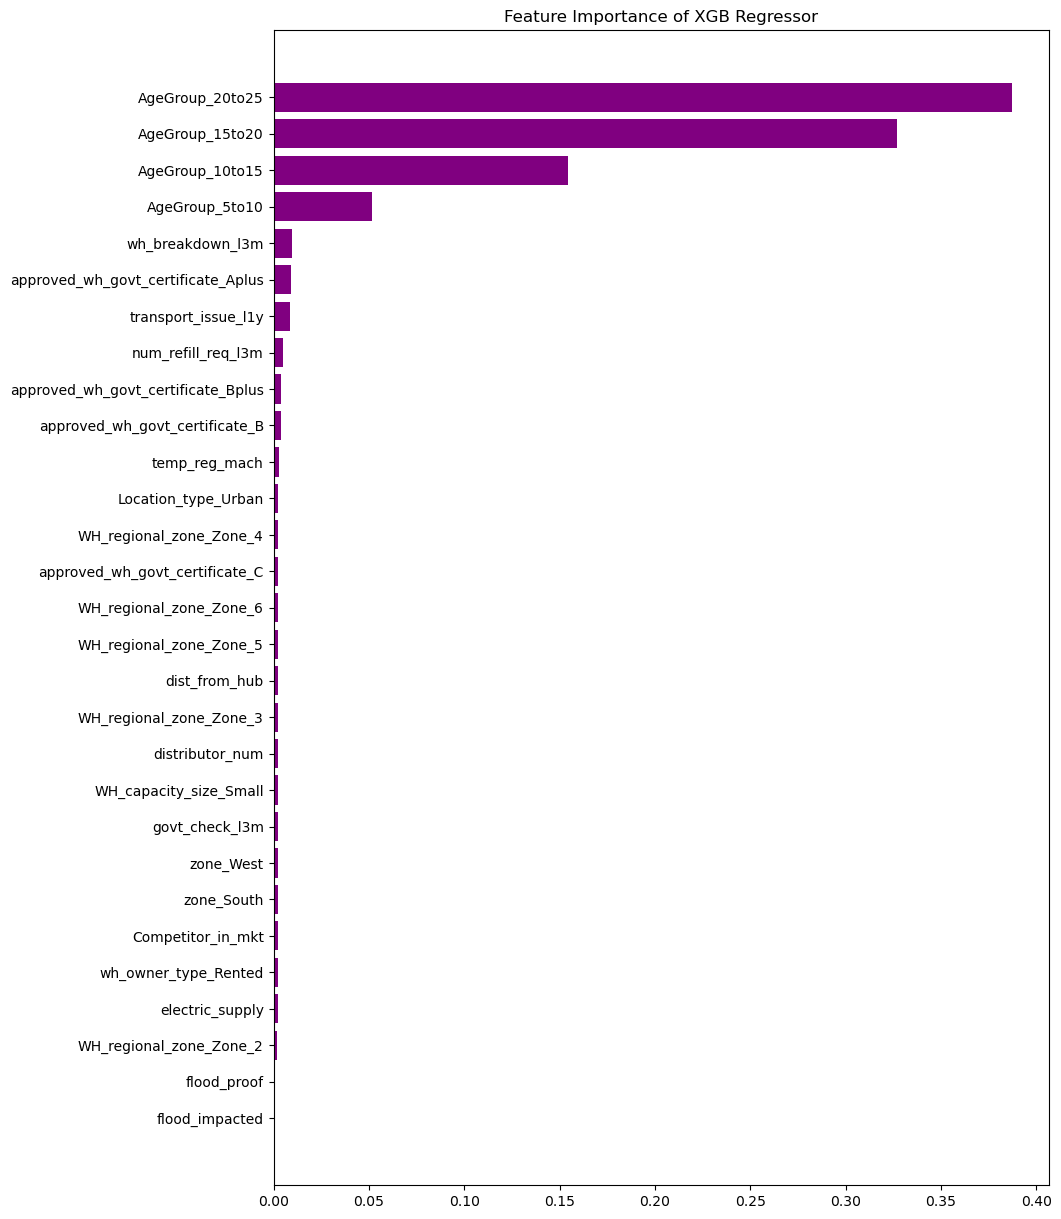

In [162]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_x = list(zip(features,xgboost.feature_importances_))
f_x.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_x],[x[1] for x in f_x],color='purple')
plt.title("Feature Importance of XGB Regressor")

plt.show()

## Model Tuning

### GridSearchCV on Ridge Regression

In [163]:
params = {'alpha': (np.linspace(0.1, 1, 25)),
              'solver' :['svd','cholesky','sag','saga','lsqr','lbfgs','sparse_cg'],
              'tol':[0.001,0.1]}
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params,cv = 10)
ridge_model.fit(x_train_scaled, y_train)

C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ]),
                         'solver': ['svd', 'cholesky', 'sag', 'saga', 'lsqr',
                                    'lbfgs', 'sparse_cg'],
                         'tol': [0.001, 0.1]})

In [164]:
print(ridge_model.best_params_)

{'alpha': 0.1, 'solver': 'saga', 'tol': 0.1}


### GridSerachCV on Lasso Regression

In [165]:
params = {'alpha': (np.linspace(0.05, 1 , 25)),
              'tol':[0.0001,0.001,0.1] }
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(x_train_scaled, y_train)

C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0.05      , 0.08958333, 0.12916667, 0.16875   , 0.20833333,
       0.24791667, 0.2875    , 0.32708333, 0.36666667, 0.40625   ,
       0.44583333, 0.48541667, 0.525     , 0.56458333, 0.60416667,
       0.64375   , 0.68333333, 0.72291667, 0.7625    , 0.80208333,
       0.84166667, 0.88125   , 0.92083333, 0.96041667, 1.        ]),
                         'tol': [0.0001, 0.001, 0.1]})

In [166]:
print(lasso_model.best_params_)

{'alpha': 0.16875, 'tol': 0.0001}


### Grid Search on Decision Tree

In [167]:
param_grid = {
    'max_depth': [20,25,30,35,40,50],  #10,15,20,25,30
    'min_samples_leaf': [3, 15,18,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [20, 25, 30, 35, 40, 50],
                         'min_samples_leaf': [3, 15, 18, 30],
                         'min_samples_split': [15, 30, 35, 40, 50]})

In [168]:
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 30, 'min_samples_split': 15}


### Grid Search for Random Forest

In [169]:
param_grid = {
    'max_depth': [10,15,20],
    'max_features': [4,6,8],
    'min_samples_leaf': [5,15,30],
    'min_samples_split': [20,30,50],
    'n_estimators': [300,400]
}

rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5)

In [170]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [5, 15, 30],
                         'min_samples_split': [20, 30, 50],
                         'n_estimators': [300, 400]})

In [171]:
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 400}


### Grid Search for MLP regressor

In [172]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=500, random_state=1)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [173]:
grid_search.fit(x_train_scaled,y_train)

C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=500, random_state=1),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [174]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [175]:
ridge = Ridge(alpha = 0.1, solver = 'saga' , tol=0.1, normalize = True)
lasso = Lasso(alpha = 0.16875, tol = 0.0001, normalize = True)
regression_model = LinearRegression()
dtr = tree.DecisionTreeRegressor(max_depth=20,min_samples_split=15,min_samples_leaf=30,random_state=1)
rfr = RandomForestRegressor(max_depth=20, max_features=8, 
                            min_samples_leaf= 5,
                            min_samples_split= 20, n_estimators= 300,
                            random_state=1)
annr = MLPRegressor(activation='relu', hidden_layer_sizes=500, 
                    solver='adam',random_state=1, 
                    max_iter=10000)


models=[ridge,lasso,regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]
for i in models:
    
     if (i != annr,rr,ls) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
     else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Ridge Regression','Lasso Regression','Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

                          Train RMSE    Test RMSE  Training Score  Test Score
Ridge Regression         6560.297053  6398.490066        0.682620    0.691490
Lasso Regression         6308.693889  6110.299408        0.706498    0.718655
Linear Regression        6307.426585  6110.812300        0.706616    0.718608
Decision Tree Regressor  5527.600367  5933.768640        0.774677    0.734677
Random Forest Regressor  5005.053520  5740.904645        0.815265    0.751644
ANN Regressor            6270.434832  6075.722585        0.710047    0.721830


### GridSearchCV on AdaBoosting

In [176]:
params = {
     'n_estimators': np.arange(10,100,10),
    'loss' : ['linear', 'square', 'exponential'],
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(AdaBoostRegressor(), param_grid= params, cv=3, n_jobs=-1)
grid_cv.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [177]:
grid_cv.best_params_ 

{'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 20}

### GridSearchCV on GradientBoosting

In [186]:
params_GBR_GS = {"max_depth": [3,5,6,7],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
            'learning_rate':[0.05,0.1,0.2],
            'n_estimators': [10,20,30]} 

model_GradR2_GS = GridSearchCV(GradientBoostingRegressor(), param_grid=params_GBR_GS)
model_GradR2_GS.fit(x_train_scaled,y_train)
model_GradR2_GS.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 20}

### GridSearchCV on Bagging

In [187]:
baggingR = BaggingRegressor()

params_bag_GS = {"n_estimators": [200,300], #50,100
              "max_features":[20,30,50], #12468
              "max_samples": [0.5,0.1,1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}

Bag_model_GS = GridSearchCV(baggingR, param_grid=params_bag_GS)
Bag_model_GS.fit(x_train_scaled,y_train)
Bag_model_GS.best_params_

C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\VIJAY\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 342, in _fit
    raise ValueError("max_features

{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 20,
 'max_samples': 0.5,
 'n_estimators': 300}

### GridSearchCV on XGBRegressor

In [188]:
params_xgbR_GS = {"max_depth": [3,4,5,6,7],
              "min_child_weight" : [4,5,6,8],
            'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],
            'n_estimators': [30,50,100]}

model_xgbR_GS = GridSearchCV(XGBRegressor(), param_grid=params_xgbR_GS)
model_xgbR_GS.fit(x_train_scaled,y_train)
model_xgbR_GS.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 100}

In [189]:
model_ABR = AdaBoostRegressor(learning_rate = 0.1,loss ='linear', n_estimators =30) #0.05,60
gbr = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 7,min_samples_leaf =10,min_samples_split =2,n_estimators=30)
bagging= BaggingRegressor(bootstrap = True,bootstrap_features=False,max_features=20,max_samples=0.1,n_estimators=200)
xgboost =XGBRegressor(learning_rate= 0.05,max_depth =7,min_child_weight= 8,n_estimators=100)

models=[model_ABR,gbr,bagging,xgboost]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['AdaBoostRegressor','GradientBoostingRegressor','BaggingRegressor','XGBRegressor']))

                            Train RMSE    Test RMSE  Training Score  \
AdaBoostRegressor          6717.759394  6535.124627        0.667201   
GradientBoostingRegressor  5535.959379  5730.604820        0.773995   
BaggingRegressor           6185.210224  6707.603816        0.717875   
XGBRegressor               5370.654515  5719.792816        0.787290   

                           Test Score  
AdaBoostRegressor            0.678173  
GradientBoostingRegressor    0.752534  
BaggingRegressor             0.660961  
XGBRegressor                 0.753467  


## Best Model

According to results, Random forest regressor is best model. Important features are calculated using random forest regressor.

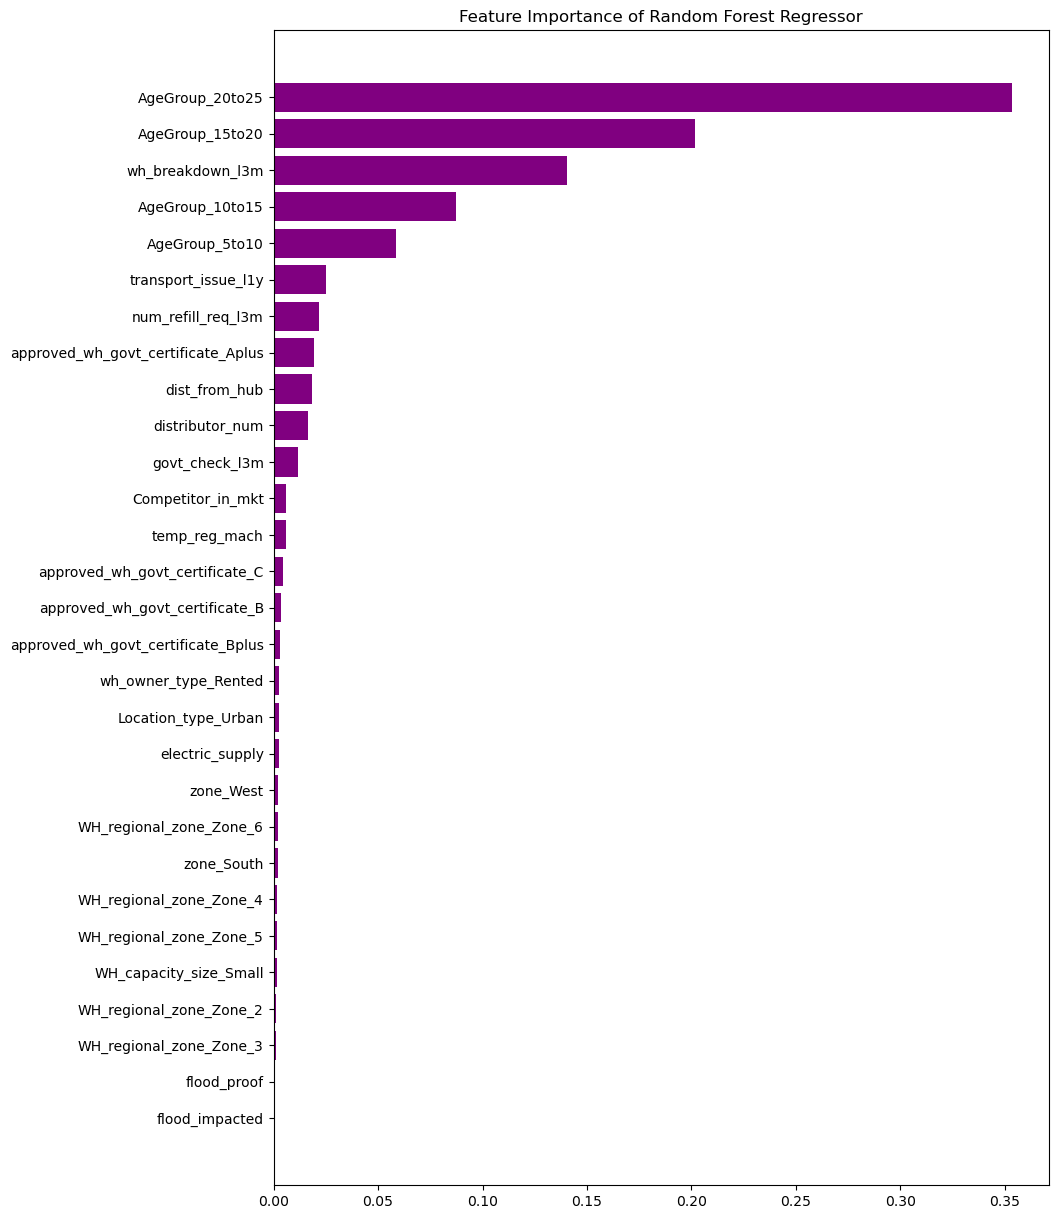

In [192]:
features = X_train.columns
plt.figure(figsize=(10,15)) 


f_i = list(zip(features,rfr.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i],color='Purple')
plt.title("Feature Importance of Random Forest Regressor")

plt.show()

Comparing models like Linear regression, Laso regression, Ridge regression, ANN, CART and Enselble methods, I got the best results for Random Forest regressor. Random forest regressor is giving 82% accuracy. To handle overfitting, I performe hyperparameter tuning using gridsearch CV. Decision tree gives high variance and to overcome that random forest is better solution. Random Forest itself calculates the feature importance.